In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import stats

In [9]:
delhivery = pd.read_csv("del.csv")

delhivery.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:27,10.435660,14,11,11.9653,1.272727,14,11,11.9653,1.272727
1,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:17,18.936842,24,20,21.7243,1.200000,10,9,9.7590,1.111111
2,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:01,27.637279,40,28,32.5395,1.428571,16,7,10.8152,2.285714
3,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 03:39,36.118028,62,40,45.5620,1.550000,21,12,13.0224,1.750000
4,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 03:33,39.386040,68,44,54.2181,1.545455,6,5,3.9153,1.200000


In [10]:
delhivery.shape


(144867, 24)

In [11]:
delhivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  int64  
 12  is_cutoff       

In [12]:
delhivery.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [13]:
delhivery["trip_creation_time"] = pd.to_datetime(delhivery["trip_creation_time"])
delhivery["od_start_time"] = pd.to_datetime(delhivery["od_start_time"])
delhivery["od_end_time"] = pd.to_datetime(delhivery["od_end_time"])

In [14]:
delhivery["trip_creation_time"].dt.month_name().value_counts()

trip_creation_time
September    127349
October       17518
Name: count, dtype: int64

In [15]:
delhivery["trip_creation_time"].dt.year.value_counts()

trip_creation_time
2018    144867
Name: count, dtype: int64

In [16]:
delhivery["trip_creation_time"].dt.day_name().value_counts()

trip_creation_time
Wednesday    26732
Thursday     20481
Friday       20240
Tuesday      19961
Saturday     19938
Monday       19645
Sunday       17870
Name: count, dtype: int64

In [17]:
# Datepoints are from the month of September and October of year 2018

In [18]:
delhivery.nunique()

data                                   2
trip_creation_time                 11341
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      16500
od_end_time                        16588
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   30049
actual_distance_to_destination    144510
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [19]:
# There are total 14817 different trips of data available
# There are 1508 unique source_center
# There are 1481 unique destination_center
# There are total 1504 delivery routes

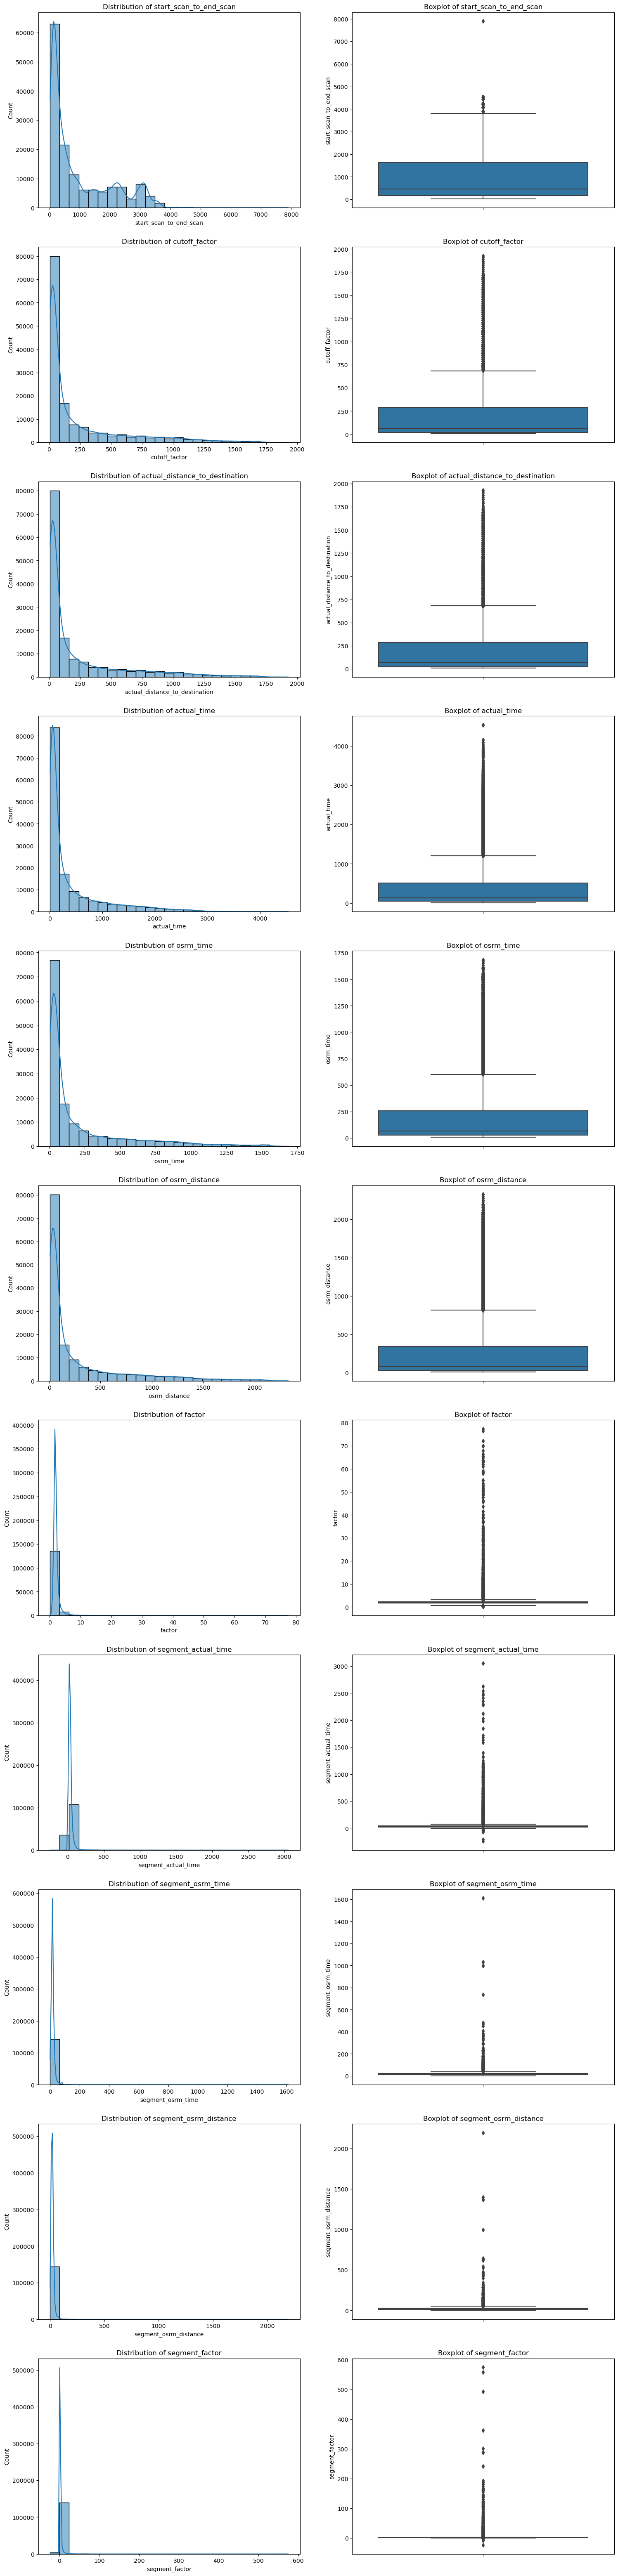

In [20]:
num_vars = delhivery.select_dtypes(include=np.number).columns.tolist()

fig, ax = plt.subplots(nrows=11, ncols=2, figsize=(18, 80))

for i in range(len(num_vars)):
    
    sns.histplot(x=delhivery[num_vars[i]], kde=True, bins = 25, ax=ax[i, 0])
    ax[i, 0].set_title(f"Distribution of {num_vars[i]}")
    
    sns.boxplot(y = delhivery[num_vars[i]], ax=ax[i, 1], data=delhivery)
    ax[i, 1].set_title(f"Boxplot of {num_vars[i]}")
    
plt.show()

In [21]:
delhivery["source_city"] = delhivery["source_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
delhivery["source_state"] = delhivery["source_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")

delhivery["destination_city"] = delhivery["destination_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
delhivery["destination_state"] = delhivery["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")

delhivery["source_pincode"] = delhivery["source_center"].apply(lambda x : x[3:9] )
delhivery["destination_pincode"] = delhivery["destination_center"].apply(lambda x : x[3:9] )

In [22]:
delhivery["time_taken_btwn_odstart_and_od_end"] = ((delhivery["od_end_time"]-delhivery["od_start_time"])/pd.Timedelta(1,unit="hour"))

In [23]:
delhivery["start_scan_to_end_scan"] = delhivery["start_scan_to_end_scan"]/60
delhivery["actual_time"] = delhivery["actual_time"]/60
delhivery["osrm_time"] = delhivery["osrm_time"]/60
delhivery["segment_actual_time"] = delhivery["segment_actual_time"]/60
delhivery["segment_osrm_time"] = delhivery["segment_osrm_time"]/60

In [24]:
delhivery.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,destination_city,destination_state,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end
0,training,2018-09-20 02:35:00,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:00,...,0.183333,11.9653,1.272727,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.433333
1,training,2018-09-20 02:35:00,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:00,...,0.150000,9.7590,1.111111,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.433333
2,training,2018-09-20 02:35:00,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:00,...,0.116667,10.8152,2.285714,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.433333
3,training,2018-09-20 02:35:00,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:00,...,0.200000,13.0224,1.750000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.433333
4,training,2018-09-20 02:35:00,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:00,...,0.083333,3.9153,1.200000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.433333


In [25]:
delhivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   data                                144867 non-null  object        
 1   trip_creation_time                  144867 non-null  datetime64[ns]
 2   route_schedule_uuid                 144867 non-null  object        
 3   route_type                          144867 non-null  object        
 4   trip_uuid                           144867 non-null  object        
 5   source_center                       144867 non-null  object        
 6   source_name                         144574 non-null  object        
 7   destination_center                  144867 non-null  object        
 8   destination_name                    144606 non-null  object        
 9   od_start_time                       144867 non-null  datetime64[ns]
 10  od_end_t

In [26]:
# cleaning 
delhivery["source_state"] = delhivery["source_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                                                       })

delhivery["destination_state"] = delhivery["destination_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                           "Delhi Delhi":"Delhi",
                           "West_Dc Maharashtra":"Maharashtra",
                           "Hub Maharashtra":"Maharashtra"
                                                       })

In [27]:
delhivery["destination_city"].replace({
    "del":"Delhi"
},inplace=True)
delhivery["source_city"].replace({
    "del":"Delhi"
},inplace=True)

delhivery["source_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)
delhivery["destination_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)
delhivery["destination_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
delhivery["destination_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)
delhivery["source_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
delhivery["source_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)

In [28]:
# Feature creation
delhivery["source_city_state"] = delhivery["source_city"] + " " + delhivery["source_state"]
delhivery["destination_city_state"] = delhivery["destination_city"] + " " + delhivery["destination_state"]

In [29]:
delhivery["source_city_state"].nunique()

1249

In [30]:
delhivery["destination_city_state"].nunique()

1242

In [31]:
delhivery["source_state"].nunique()

33

In [32]:
delhivery["destination_state"].nunique()

32

In [35]:
data = delhivery.copy()


In [36]:
data.drop(
    ['source_center',"source_name","destination_center","destination_name","cutoff_timestamp", "od_end_time","od_start_time"],
    axis = 1,
    inplace=True
)

In [37]:
data.shape

(144867, 26)

In [38]:
actual_time = data.groupby(["trip_uuid","start_scan_to_end_scan"])["actual_time"].max().reset_index().groupby("trip_uuid")["actual_time"].sum().reset_index()

actual_time

,trip_uuid,actual_time
0,trip-153671041653548748,26.033333
1,trip-153671042288605164,2.383333
2,trip-153671043369099517,55.783333
3,trip-153671046011330457,0.983333
4,trip-153671052974046625,5.683333
...,...,...
14812,trip-153861095625827784,1.383333
14813,trip-153861104386292051,0.350000
14814,trip-153861106442901555,4.700000
14815,trip-153861115439069069,4.400000


In [39]:
segment_osrm_time = data[["trip_uuid","segment_osrm_time"]].groupby("trip_uuid")["segment_osrm_time"].sum().reset_index()
segment_osrm_time

,trip_uuid,segment_osrm_time
0,trip-153671041653548748,16.800000
1,trip-153671042288605164,1.083333
2,trip-153671043369099517,32.350000
3,trip-153671046011330457,0.266667
4,trip-153671052974046625,1.916667
...,...,...
14812,trip-153861095625827784,1.033333
14813,trip-153861104386292051,0.183333
14814,trip-153861106442901555,1.466667
14815,trip-153861115439069069,3.683333


In [40]:
segment_actual_time = data.groupby("trip_uuid")["segment_actual_time"].sum().reset_index()
segment_actual_time

,trip_uuid,segment_actual_time
0,trip-153671041653548748,25.800000
1,trip-153671042288605164,2.350000
2,trip-153671043369099517,55.133333
3,trip-153671046011330457,0.983333
4,trip-153671052974046625,5.666667
...,...,...
14812,trip-153861095625827784,1.366667
14813,trip-153861104386292051,0.350000
14814,trip-153861106442901555,4.683333
14815,trip-153861115439069069,4.300000


In [41]:
osrm_time = data.groupby(["trip_uuid","start_scan_to_end_scan"])["osrm_time"].max().reset_index().groupby("trip_uuid")["osrm_time"].sum().reset_index()
osrm_time

,trip_uuid,osrm_time
0,trip-153671041653548748,12.383333
1,trip-153671042288605164,1.133333
2,trip-153671043369099517,29.016667
3,trip-153671046011330457,0.250000
4,trip-153671052974046625,1.950000
...,...,...
14812,trip-153861095625827784,1.033333
14813,trip-153861104386292051,0.200000
14814,trip-153861106442901555,0.900000
14815,trip-153861115439069069,3.066667


In [42]:
time_taken_btwn_odstart_and_od_end = data.groupby("trip_uuid")["time_taken_btwn_odstart_and_od_end"].unique().reset_index()
time_taken_btwn_odstart_and_od_end

,trip_uuid,time_taken_btwn_odstart_and_od_end
0,trip-153671041653548748,"[16.65, 21.016666666666666]"
1,trip-153671042288605164,"[2.05, 0.9833333333333333]"
2,trip-153671043369099517,"[51.666666666666664, 13.9]"
3,trip-153671046011330457,[1.6666666666666667]
4,trip-153671052974046625,"[2.533333333333333, 1.3333333333333333, 8.1]"
...,...,...
14812,trip-153861095625827784,"[2.55, 1.75]"
14813,trip-153861104386292051,[1.0]
14814,trip-153861106442901555,"[2.9, 4.133333333333334]"
14815,trip-153861115439069069,"[1.75, 0.75, 1.0333333333333334, 1.51666666666..."


In [43]:
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"] = time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].apply(sum)
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]

0        37.666667
1         3.033333
2        65.566667
3         1.666667
4        11.966667
           ...    
14812     4.300000
14813     1.000000
14814     7.033333
14815     5.050000
14816     5.916667
Name: time_taken_btwn_odstart_and_od_end, Length: 14817, dtype: float64

In [44]:
start_scan_to_end_scan = ((data.groupby("trip_uuid")["start_scan_to_end_scan"].unique())).reset_index()
start_scan_to_end_scan

,trip_uuid,start_scan_to_end_scan
0,trip-153671041653548748,"[16.65, 21.0]"
1,trip-153671042288605164,"[2.033333333333333, 0.9666666666666667]"
2,trip-153671043369099517,"[51.65, 13.9]"
3,trip-153671046011330457,[1.6666666666666667]
4,trip-153671052974046625,"[2.533333333333333, 1.3333333333333333, 8.0833..."
...,...,...
14812,trip-153861095625827784,"[2.533333333333333, 1.75]"
14813,trip-153861104386292051,[1.0]
14814,trip-153861106442901555,"[2.8833333333333333, 4.133333333333334]"
14815,trip-153861115439069069,"[1.75, 0.7333333333333333, 1.0333333333333334,..."


In [45]:
start_scan_to_end_scan["start_scan_to_end_scan"] = start_scan_to_end_scan["start_scan_to_end_scan"].apply(sum) 
start_scan_to_end_scan["start_scan_to_end_scan"]

0        37.650000
1         3.000000
2        65.550000
3         1.666667
4        11.950000
           ...    
14812     4.283333
14813     1.000000
14814     7.016667
14815     5.783333
14816     5.883333
Name: start_scan_to_end_scan, Length: 14817, dtype: float64

In [46]:
osrm_distance = data.groupby(["trip_uuid","start_scan_to_end_scan"])["osrm_distance"].max().reset_index().groupby("trip_uuid")["osrm_distance"].sum().reset_index()

osrm_distance

,trip_uuid,osrm_distance
0,trip-153671041653548748,991.3523
1,trip-153671042288605164,85.1110
2,trip-153671043369099517,2372.0852
3,trip-153671046011330457,19.6800
4,trip-153671052974046625,146.7918
...,...,...
14812,trip-153861095625827784,73.4630
14813,trip-153861104386292051,16.0882
14814,trip-153861106442901555,63.2841
14815,trip-153861115439069069,177.6635


In [47]:
actual_distance_to_destination = data.groupby(["trip_uuid","start_scan_to_end_scan"])["actual_distance_to_destination"].max().reset_index().groupby("trip_uuid")["actual_distance_to_destination"].sum().reset_index()
actual_distance_to_destination

,trip_uuid,actual_distance_to_destination
0,trip-153671041653548748,824.732854
1,trip-153671042288605164,73.186911
2,trip-153671043369099517,1932.273969
3,trip-153671046011330457,17.175274
4,trip-153671052974046625,127.448500
...,...,...
14812,trip-153861095625827784,57.762332
14813,trip-153861104386292051,15.513784
14814,trip-153861106442901555,38.684839
14815,trip-153861115439069069,134.723836


In [48]:
segment_osrm_distance = data[["trip_uuid","segment_osrm_distance"]].groupby("trip_uuid")["segment_osrm_distance"].sum().reset_index()

segment_osrm_distance

,trip_uuid,segment_osrm_distance
0,trip-153671041653548748,1320.4733
1,trip-153671042288605164,84.1894
2,trip-153671043369099517,2545.2678
3,trip-153671046011330457,19.8766
4,trip-153671052974046625,146.7919
...,...,...
14812,trip-153861095625827784,64.8551
14813,trip-153861104386292051,16.0883
14814,trip-153861106442901555,104.8866
14815,trip-153861115439069069,223.5324


# Hypothesis Testing 


#### 1. Analysing TimeTaken Between OdStart and OdEnd time & StartScanToEndScan :


H0: Mean of time taken between trip end and start time = Mean of start and end scan time


Ha: Mean of time taken between trip end and start time != Mean of start and end scan time

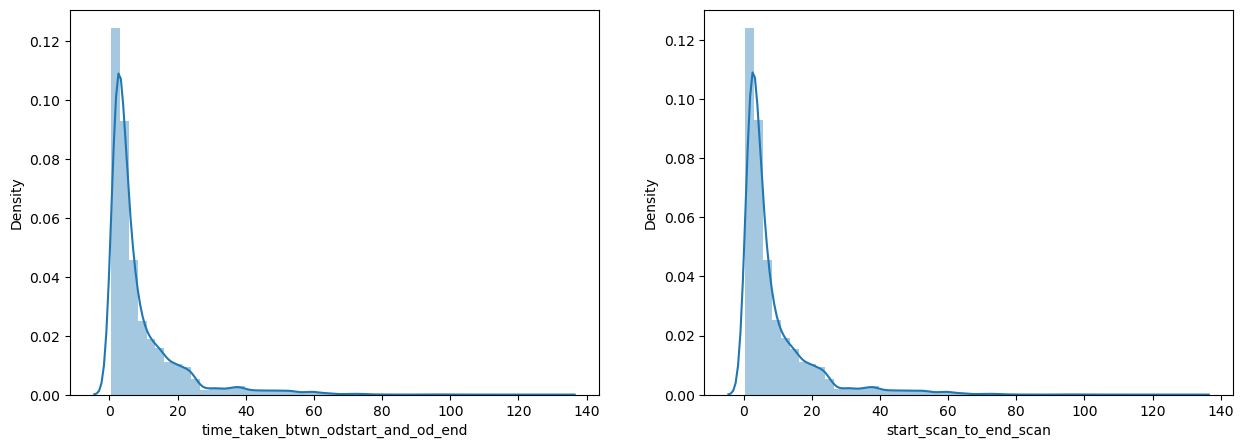

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

plt.show()

In [51]:
# KS Test to check the similarity of distribution of these two.
ks_test, p_value = stats.ks_2samp(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"],start_scan_to_end_scan["start_scan_to_end_scan"])

In [52]:
# Ho: The distribution are similar
# Ha: The disbutions are different 

if p_value < 0.05:
    print("Reject Ho: The distribution are different.")
else :
    print("Fail to reject Ho: The distribution is same.")

Fail to reject Ho: The distribution is same.


In [53]:
for i in range(5):
    print(stats.ttest_ind((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(3000)),(start_scan_to_end_scan["start_scan_to_end_scan"].sample(3000))))

TtestResult(statistic=1.2782439996725836, pvalue=0.20121286828660134, df=5998.0)
TtestResult(statistic=0.8569393136299838, pvalue=0.39151266022964903, df=5998.0)
TtestResult(statistic=0.6153651256983375, pvalue=0.5383369639223312, df=5998.0)
TtestResult(statistic=1.422825437364155, pvalue=0.15483877125657952, df=5998.0)
TtestResult(statistic=0.8963934659515166, pvalue=0.37007863029005283, df=5998.0)


from 2 sample t-test ,we can also conclude that Average time_taken_btwn_odstart_and_od_end for population is also equal to Average start_scan_to_end_scan for population.

In [57]:
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].mean(),time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].std()

(8.851417290949586, 10.979505310032977)

In [58]:
start_scan_to_end_scan["start_scan_to_end_scan"].mean(),start_scan_to_end_scan["start_scan_to_end_scan"].std()


(8.835777597804324, 10.97628639143973)

variance and means both are closly similar for scan time and trip start and end time taken

#### 2. Analysing Actual Time taken to complete the delivery & start-scan-end-scan¶

H0: Mean of start and end scan time <= Mean of Actual time taken to complete delivery


Ha: Mean of start and end scan time > Mean of Actual time taken to complete delivery

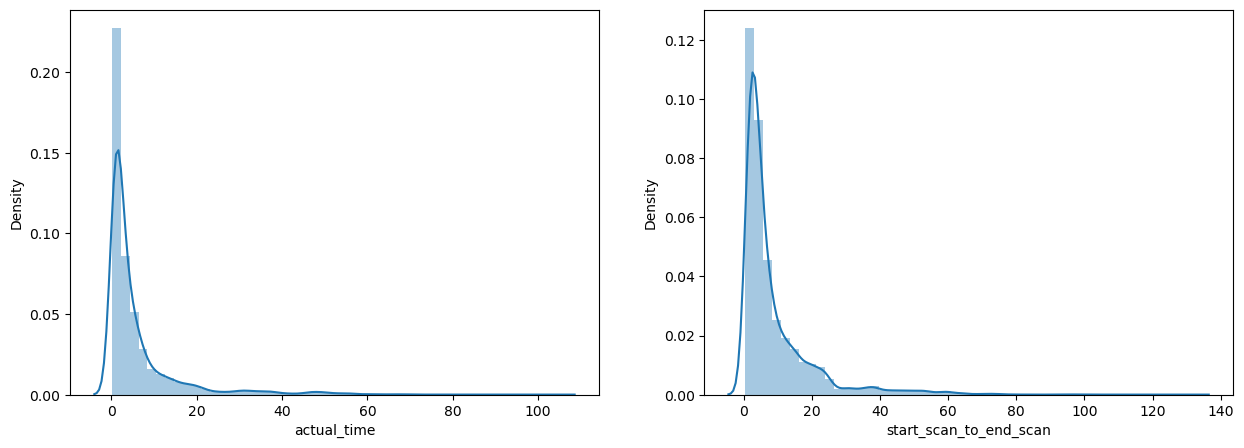

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((actual_time["actual_time"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

plt.show()

In [55]:
stats.ks_2samp(actual_time["actual_time"],start_scan_to_end_scan["start_scan_to_end_scan"])

KstestResult(statistic=0.27387460349598436, pvalue=0.0, statistic_location=1.8499999999999999, statistic_sign=1)

In [56]:
for i in range(7):
    print(stats.ttest_ind((actual_time["actual_time"].sample(3000)),(start_scan_to_end_scan["start_scan_to_end_scan"].sample(3000)),alternative="less"))

TtestResult(statistic=-11.755852113873939, pvalue=7.298667647697912e-32, df=5998.0)
TtestResult(statistic=-10.990746350960485, pvalue=3.8966002223532877e-28, df=5998.0)
TtestResult(statistic=-11.324960846718898, pvalue=9.807236413310926e-30, df=5998.0)
TtestResult(statistic=-10.257529765088908, pvalue=8.71189037194448e-25, df=5998.0)
TtestResult(statistic=-11.701772537025603, pvalue=1.3629033886871839e-31, df=5998.0)
TtestResult(statistic=-11.438768080580687, pvalue=2.733353771544634e-30, df=5998.0)
TtestResult(statistic=-12.343333753189588, pvalue=6.937712890013973e-35, df=5998.0)


In [59]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(5.945176711435065, 9.35554782297388)

In [60]:
start_scan_to_end_scan["start_scan_to_end_scan"].mean(),start_scan_to_end_scan["start_scan_to_end_scan"].std()

(8.835777597804324, 10.97628639143973)

#### Analysing Actual Time & TimeTaken between start and end trip time.

H0: Mean of Actual time taken to complete delivery = Mean of time taken betweenn trip end and start time

Ha: Mean of Actual time taken to complete delivery != Mean of time taken betweenn trip end and start time

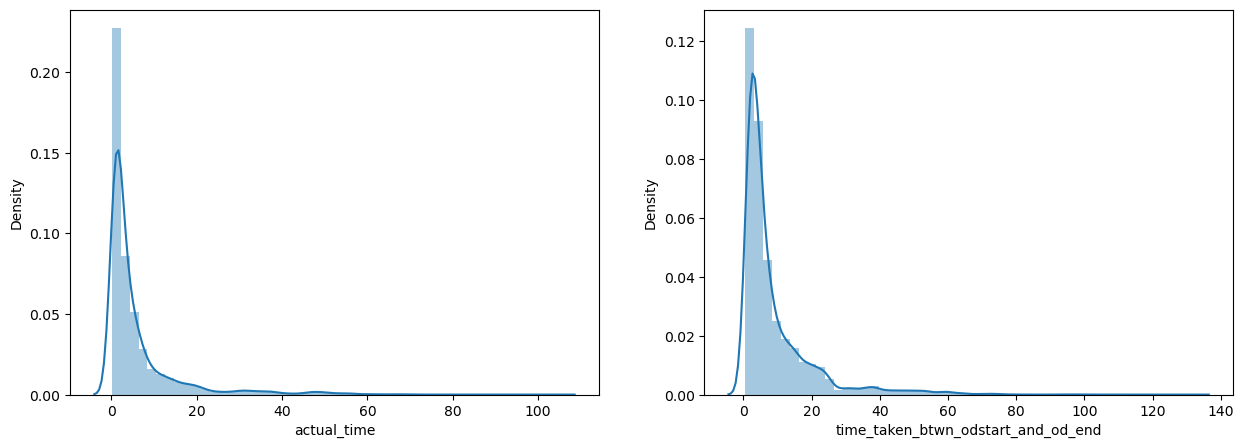

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((actual_time["actual_time"]))
plt.subplot(122)
sns.distplot((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]))

plt.show()

In [62]:
stats.ks_2samp(actual_time["actual_time"],time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"])

KstestResult(statistic=0.27481946412904096, pvalue=0.0, statistic_location=1.8499999999999999, statistic_sign=1)

In [63]:

for i in range(5):
    print(stats.ttest_ind((actual_time["actual_time"].sample(1000)),(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(1000))))

TtestResult(statistic=-6.083199262670441, pvalue=1.4080644951275083e-09, df=1998.0)
TtestResult(statistic=-5.219224114762029, pvalue=1.9831002085763817e-07, df=1998.0)
TtestResult(statistic=-4.724823219527052, pvalue=2.4636426528959586e-06, df=1998.0)
TtestResult(statistic=-7.647146245022954, pvalue=3.17168836152048e-14, df=1998.0)
TtestResult(statistic=-5.137799930567112, pvalue=3.050329850466839e-07, df=1998.0)


from above kstest of distribution and two sample ttest , we can conclude that population mean Actual time taken to complete delivery and population mean time_taken_btwn_od_start_and_od_end are also not same.

#### Analysing Actual Time taken to complete delivery from source to destination hub & OSRM measured time :

H0: Mean of OSRM time >= Mean of Actual time taken to complete delivery

Ha: Mean of OSRM time < Mean of Actual time taken to complete delivery

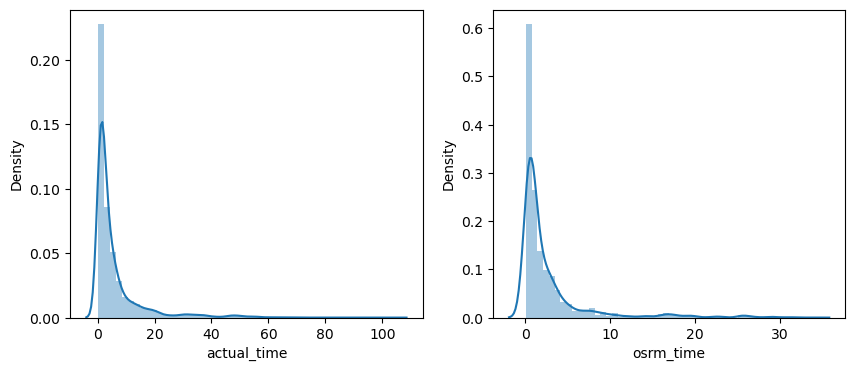

In [64]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((osrm_time["osrm_time"])))

plt.show()

In [65]:
stats.ks_2samp(actual_time["actual_time"],osrm_time["osrm_time"])

KstestResult(statistic=0.2945265573327934, pvalue=0.0, statistic_location=0.6833333333333333, statistic_sign=-1)

In [66]:
for i in range(5):
    print(stats.ttest_ind(actual_time["actual_time"].sample(5000),
               osrm_time["osrm_time"].sample(5000),alternative='greater'))

TtestResult(statistic=22.780629191008412, pvalue=2.458234859904297e-112, df=9998.0)
TtestResult(statistic=22.846045222630803, pvalue=5.934586643193457e-113, df=9998.0)
TtestResult(statistic=22.692340657349227, pvalue=1.6639890329980265e-111, df=9998.0)
TtestResult(statistic=21.77480874900053, pvalue=4.788566721120829e-103, df=9998.0)
TtestResult(statistic=21.06316043497502, pvalue=1.0550940170917988e-96, df=9998.0)


In [67]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(5.945176711435065, 9.35554782297388)

In [68]:
osrm_time["osrm_time"].mean(),osrm_time["osrm_time"].std()

(2.6973138962003107, 4.537654251845703)

from two sample ttest can conclude , that population mean actual time taken to complete delivert from source to warehouse and orsm estimate mean time for population are not same.

actual time is higher than the osrm estimated time for delivery.

#### Analysing Actual Time taken to complete delivery from source to destination hub & Segment Actual Time :

H0: Actual time = segment actual time


Ha: Actual time != segment actual time

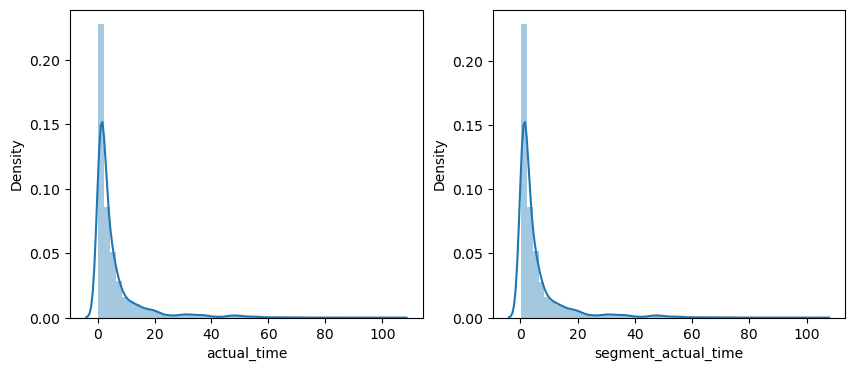

In [69]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((segment_actual_time["segment_actual_time"])))

plt.show()

In [70]:
for i in range(7):
    print(stats.ttest_ind((actual_time["actual_time"].sample(3000)),(segment_actual_time["segment_actual_time"].sample(3000))))

TtestResult(statistic=0.11184726534282982, pvalue=0.9109482528818329, df=5998.0)
TtestResult(statistic=-0.5567421358823326, pvalue=0.5777243951962947, df=5998.0)
TtestResult(statistic=-0.06932063349025644, pvalue=0.9447367129092087, df=5998.0)
TtestResult(statistic=-0.11705095744122383, pvalue=0.9068235917713142, df=5998.0)
TtestResult(statistic=0.4552282141335819, pvalue=0.648961541732612, df=5998.0)
TtestResult(statistic=0.9058018728999901, pvalue=0.3650771135706299, df=5998.0)
TtestResult(statistic=0.6551094006282187, pvalue=0.5124224426247125, df=5998.0)


In [71]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(5.945176711435065, 9.35554782297388)

In [72]:
segment_actual_time["segment_actual_time"].mean(),segment_actual_time["segment_actual_time"].std()


(5.8982047647971925, 9.270799413152762)

from two sample ttest , we can conclude that:

Population average for
Actual Time taken to complete delivery trip and segment actual time are same.

####  Analysing osrm Time & segment-osrm-time

Ho: segment actual time <= OSRM time

Ha: segment actual time > OSRM time

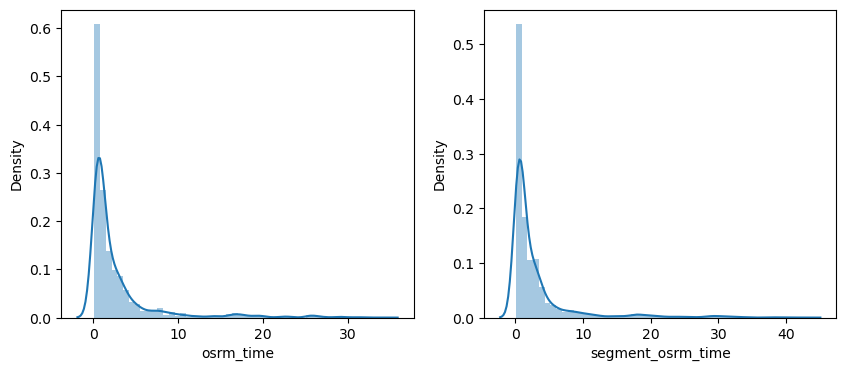

In [73]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_time["osrm_time"])))
plt.subplot(122)
sns.distplot(((segment_osrm_time["segment_osrm_time"])))

plt.show()

In [74]:
for i in range(7):
    print(stats.ttest_ind((osrm_time["osrm_time"].sample(3000)), (segment_osrm_time["segment_osrm_time"].sample(3000)),alternative ="less"))

TtestResult(statistic=-3.432030550890356, pvalue=0.000301563321703004, df=5998.0)
TtestResult(statistic=-4.584791227277614, pvalue=2.3183184735362395e-06, df=5998.0)
TtestResult(statistic=-3.010885662583602, pvalue=0.0013078585909630334, df=5998.0)
TtestResult(statistic=-3.324599323772153, pvalue=0.00044538513141652937, df=5998.0)
TtestResult(statistic=-2.1320707398969256, pvalue=0.016520772680337387, df=5998.0)
TtestResult(statistic=-1.5655644930238548, pvalue=0.05875168069467215, df=5998.0)
TtestResult(statistic=-2.5849646332958787, pvalue=0.004881144380961, df=5998.0)


In [75]:
osrm_time["osrm_time"].mean(),osrm_time["osrm_time"].std()

(2.6973138962003107, 4.537654251845703)

In [76]:
segment_osrm_time["segment_osrm_time"].mean(),segment_osrm_time["segment_osrm_time"].std()

(3.0158297901059594, 5.242367441693007)

from ttest , we can conclude that

average of osrm Time & segment-osrm-time for population is not same.
Population Mean osrm time is less than Population Mean segment osrm time.

#### Analysing and Visulizing OSRM Estimated distance and Segment-osrm-distance

H0 : Segment OSRM distnace <= OSRM distnace

Ha : Segment OSRM distnace > OSRM distnace

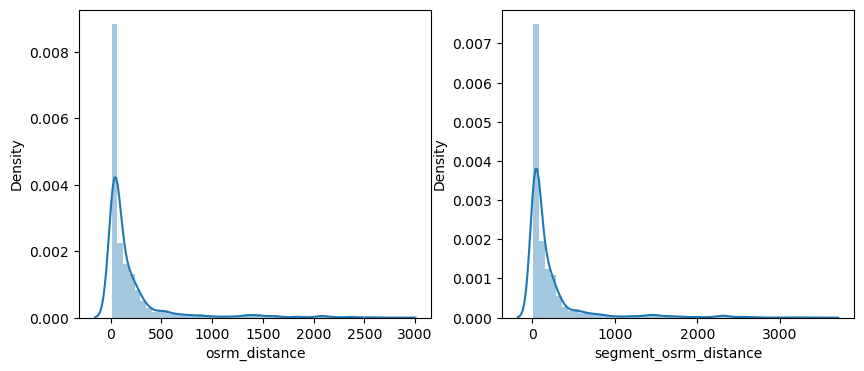

In [77]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_distance["osrm_distance"])))
plt.subplot(122)
sns.distplot(((segment_osrm_distance["segment_osrm_distance"])))

plt.show()

In [78]:
stats.ks_2samp(osrm_distance["osrm_distance"],segment_osrm_distance["segment_osrm_distance"])

KstestResult(statistic=0.03948167645272321, pvalue=1.8042208791084262e-10, statistic_location=50.2941, statistic_sign=1)

In [79]:
for i in range(7):
    print(stats.ttest_ind(osrm_distance["osrm_distance"].sample(5000),segment_osrm_distance["segment_osrm_distance"].sample(5000),alternative="less"))

TtestResult(statistic=-1.8043745179475728, pvalue=0.0356013480918173, df=9998.0)
TtestResult(statistic=-2.765864171970909, pvalue=0.002843818270578869, df=9998.0)
TtestResult(statistic=-1.0901759913781357, pvalue=0.1378309503114925, df=9998.0)
TtestResult(statistic=-2.885628323628535, pvalue=0.001957344119616762, df=9998.0)
TtestResult(statistic=-1.8867117075968773, pvalue=0.02961403084889808, df=9998.0)
TtestResult(statistic=-2.0845012893187413, pvalue=0.018569955331258638, df=9998.0)
TtestResult(statistic=-3.14935057043821, pvalue=0.0008205783299805479, df=9998.0)


In [80]:
osrm_distance["osrm_distance"].mean(),osrm_distance["osrm_distance"].std()

(204.83672531551593, 370.74927471335496)

In [81]:
segment_osrm_distance["segment_osrm_distance"].mean(),segment_osrm_distance["segment_osrm_distance"].std()

(223.20116128771005, 416.6283742907418)

from KS test , we can conclude the distributions of segment osrm distance and osrm distnace are not same!


from two sample one sided ttest, we can conclude: Average of osrm distance for population is less than average of segment osrm distance

#### Analysing and Visulizing OSRM Estimated distance and Actual Distance between source and destination warehouse 

H0 : Mean OSRM distance <= Mean Actual distnace

Ha : Mean OSRM distance > Mean Actual distnace

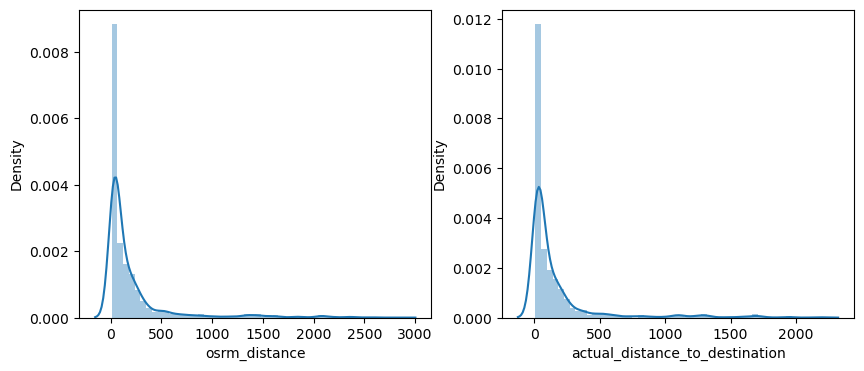

In [82]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_distance["osrm_distance"])))
plt.subplot(122)
sns.distplot(((actual_distance_to_destination["actual_distance_to_destination"])))

plt.show()

In [83]:
stats.ks_2samp(osrm_distance["osrm_distance"],actual_distance_to_destination["actual_distance_to_destination"])

KstestResult(statistic=0.11837753931295136, pvalue=6.578385372142345e-91, statistic_location=25.2474853, statistic_sign=-1)

In [84]:
for i in range(5):
    print(stats.ttest_ind(osrm_distance["osrm_distance"].sample(5000),actual_distance_to_destination["actual_distance_to_destination"].sample(5000),alternative="greater"))

TtestResult(statistic=6.2795926505941955, pvalue=1.767860932639128e-10, df=9998.0)
TtestResult(statistic=4.4050940416195035, pvalue=5.341931952344174e-06, df=9998.0)
TtestResult(statistic=5.4191707179950575, pvalue=3.063370313272996e-08, df=9998.0)
TtestResult(statistic=6.634028715120583, pvalue=1.7177686266423157e-11, df=9998.0)
TtestResult(statistic=6.274275953870753, pvalue=1.8290874713406007e-10, df=9998.0)


In [85]:
osrm_distance["osrm_distance"].mean(),osrm_distance["osrm_distance"].std()

(204.83672531551593, 370.74927471335496)

In [86]:
actual_distance_to_destination["actual_distance_to_destination"].mean(),actual_distance_to_destination["actual_distance_to_destination"].std()

(164.47332174538093, 305.5408288910468)

From left sided ttest , we can conclude

for population OSRM estimated distance is higher than the actual distance from source to destination warehouse.

In [87]:
distances = segment_osrm_distance.merge(actual_distance_to_destination.merge(osrm_distance,on="trip_uuid"),on="trip_uuid")

In [88]:
distances

,trip_uuid,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,trip-153671041653548748,1320.4733,824.732854,991.3523
1,trip-153671042288605164,84.1894,73.186911,85.1110
2,trip-153671043369099517,2545.2678,1932.273969,2372.0852
3,trip-153671046011330457,19.8766,17.175274,19.6800
4,trip-153671052974046625,146.7919,127.448500,146.7918
...,...,...,...,...
14812,trip-153861095625827784,64.8551,57.762332,73.4630
14813,trip-153861104386292051,16.0883,15.513784,16.0882
14814,trip-153861106442901555,104.8866,38.684839,63.2841
14815,trip-153861115439069069,223.5324,134.723836,177.6635


In [89]:
time = segment_osrm_time.merge(osrm_time.merge(segment_actual_time.merge(actual_time.merge(time_taken_btwn_odstart_and_od_end.merge(start_scan_to_end_scan,on="trip_uuid",),on="trip_uuid"),on="trip_uuid"),on="trip_uuid"),on="trip_uuid")

time

,trip_uuid,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan
0,trip-153671041653548748,16.800000,12.383333,25.800000,26.033333,37.666667,37.650000
1,trip-153671042288605164,1.083333,1.133333,2.350000,2.383333,3.033333,3.000000
2,trip-153671043369099517,32.350000,29.016667,55.133333,55.783333,65.566667,65.550000
3,trip-153671046011330457,0.266667,0.250000,0.983333,0.983333,1.666667,1.666667
4,trip-153671052974046625,1.916667,1.950000,5.666667,5.683333,11.966667,11.950000
...,...,...,...,...,...,...,...
14812,trip-153861095625827784,1.033333,1.033333,1.366667,1.383333,4.300000,4.283333
14813,trip-153861104386292051,0.183333,0.200000,0.350000,0.350000,1.000000,1.000000
14814,trip-153861106442901555,1.466667,0.900000,4.683333,4.700000,7.033333,7.016667
14815,trip-153861115439069069,3.683333,3.066667,4.300000,4.400000,5.050000,5.783333


In [90]:
Merge1 = time.merge(distances,on="trip_uuid",
                                        )
Merge1

,trip_uuid,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,trip-153671041653548748,16.800000,12.383333,25.800000,26.033333,37.666667,37.650000,1320.4733,824.732854,991.3523
1,trip-153671042288605164,1.083333,1.133333,2.350000,2.383333,3.033333,3.000000,84.1894,73.186911,85.1110
2,trip-153671043369099517,32.350000,29.016667,55.133333,55.783333,65.566667,65.550000,2545.2678,1932.273969,2372.0852
3,trip-153671046011330457,0.266667,0.250000,0.983333,0.983333,1.666667,1.666667,19.8766,17.175274,19.6800
4,trip-153671052974046625,1.916667,1.950000,5.666667,5.683333,11.966667,11.950000,146.7919,127.448500,146.7918
...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,1.033333,1.033333,1.366667,1.383333,4.300000,4.283333,64.8551,57.762332,73.4630
14813,trip-153861104386292051,0.183333,0.200000,0.350000,0.350000,1.000000,1.000000,16.0883,15.513784,16.0882
14814,trip-153861106442901555,1.466667,0.900000,4.683333,4.700000,7.033333,7.016667,104.8866,38.684839,63.2841
14815,trip-153861115439069069,3.683333,3.066667,4.300000,4.400000,5.050000,5.783333,223.5324,134.723836,177.6635


In [91]:
city = data.groupby("trip_uuid")[["source_city",
                                  "destination_city"]].aggregate({
        "source_city":pd.unique,
    "destination_city":pd.unique,
})

state = data.groupby("trip_uuid")[["source_state",
                                   "destination_state"]].aggregate({
        "source_state":pd.unique,
    "destination_state":pd.unique,
})

city_state = data.groupby("trip_uuid")[["source_city_state",
                                        "destination_city_state"]].aggregate({
        "source_city_state":pd.unique,
    "destination_city_state":pd.unique,
})

locations = city.merge(city_state.merge(state,on="trip_uuid"
                            ,how="outer"),
           on="trip_uuid",
           how="outer")

In [92]:
route_type = data.groupby("trip_uuid")["route_type"].unique().reset_index()

Merged = route_type.merge(locations.merge(Merge1,on="trip_uuid",
           how="outer"),
                 on="trip_uuid",
           how="outer"
                )

In [93]:
trip_records = Merged.copy()

In [94]:
trip_records["route_type"] = trip_records["route_type"].apply(lambda x:x[0])
route_to_merge = data.groupby("trip_uuid")["route_schedule_uuid"].unique().reset_index()
trip_records = trip_records.merge(route_to_merge,on="trip_uuid",how="outer")
trip_records["route_schedule_uuid"] = trip_records["route_schedule_uuid"].apply(lambda x:x[0])
trip_records

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,FTL,"[Bhopal, Kanpur]","[Kanpur, Gurgaon]","[Bhopal Madhya Pradesh, Kanpur Uttar Pradesh]","[Kanpur Uttar Pradesh, Gurgaon Haryana]","[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]",16.800000,12.383333,25.800000,26.033333,37.666667,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,"[Tumkur, Doddablpur]","[Doddablpur, Chikblapur]","[Tumkur Karnataka, Doddablpur Karnataka]","[Doddablpur Karnataka, Chikblapur Karnataka]",[Karnataka],[Karnataka],1.083333,1.133333,2.350000,2.383333,3.033333,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
2,trip-153671043369099517,FTL,"[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]","[Bengaluru Karnataka, Gurgaon Haryana]","[Gurgaon Haryana, Chandigarh Punjab]","[Karnataka, Haryana]","[Haryana, Punjab]",32.350000,29.016667,55.133333,55.783333,65.566667,65.550000,2545.2678,1932.273969,2372.0852,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...
3,trip-153671046011330457,Carting,[Mumbai],[Mumbai],[Mumbai Hub Maharashtra],[Mumbai Maharashtra],[Hub Maharashtra],[Maharashtra],0.266667,0.250000,0.983333,0.983333,1.666667,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,"[Bellary, Hospet, Sandur]","[Hospet, Sandur, Bellary]","[Bellary Karnataka, Hospet Karnataka, Sandur K...","[Hospet Karnataka, Sandur Karnataka, Bellary K...",[Karnataka],[Karnataka],1.916667,1.950000,5.666667,5.683333,11.966667,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Carting,[Chandigarh],"[Zirakpur, Chandigarh]","[Chandigarh Punjab, Chandigarh Chandigarh]","[Zirakpur Punjab, Chandigarh Punjab]","[Punjab, Chandigarh]",[Punjab],1.033333,1.033333,1.366667,1.383333,4.300000,4.283333,64.8551,57.762332,73.4630,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,Carting,[FBD],[Faridabad],[FBD Haryana],[Faridabad Haryana],[Haryana],[Haryana],0.183333,0.200000,0.350000,0.350000,1.000000,1.000000,16.0883,15.513784,16.0882,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,Carting,[Kanpur],[Kanpur],[Kanpur Uttar Pradesh],[Kanpur Uttar Pradesh],[Uttar Pradesh],[Uttar Pradesh],1.466667,0.900000,4.683333,4.700000,7.033333,7.016667,104.8866,38.684839,63.2841,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,Carting,"[Tirunelveli, Eral, Tirchchndr, Thisayanvilai,...","[Eral, Tirchchndr, Thisayanvilai, Peikulam, Ti...","[Tirunelveli Tamil Nadu, Eral Tamil Nadu, Tirc...","[Eral Tamil Nadu, Tirchchndr Tamil Nadu, Thisa...",[Tamil Nadu],[Tamil Nadu],3.683333,3.066667,4.300000,4.400000,5.050000,5.783333,223.5324,134.723836,177.6635,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


In [95]:
trip_records.isna().sum()

trip_uuid                             0
route_type                            0
source_city                           0
destination_city                      0
source_city_state                     0
destination_city_state                0
source_state                          0
destination_state                     0
segment_osrm_time                     0
osrm_time                             0
segment_actual_time                   0
actual_time                           0
time_taken_btwn_odstart_and_od_end    0
start_scan_to_end_scan                0
segment_osrm_distance                 0
actual_distance_to_destination        0
osrm_distance                         0
route_schedule_uuid                   0
dtype: int64

In [96]:
trip_records["source_city"] = trip_records["source_city"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_city"] = trip_records["destination_city"].astype("str").str.strip("[]").str.replace("'","")
trip_records["source_city_state"] = trip_records["source_city_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_city_state"] = trip_records["destination_city_state"].astype("str").str.strip("[]").str.replace("'","")

trip_records["source_state"] = trip_records["source_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_state"] = trip_records["destination_state"].astype("str").str.strip("[]").str.replace("'","")

# Outlier Detection and Treatment


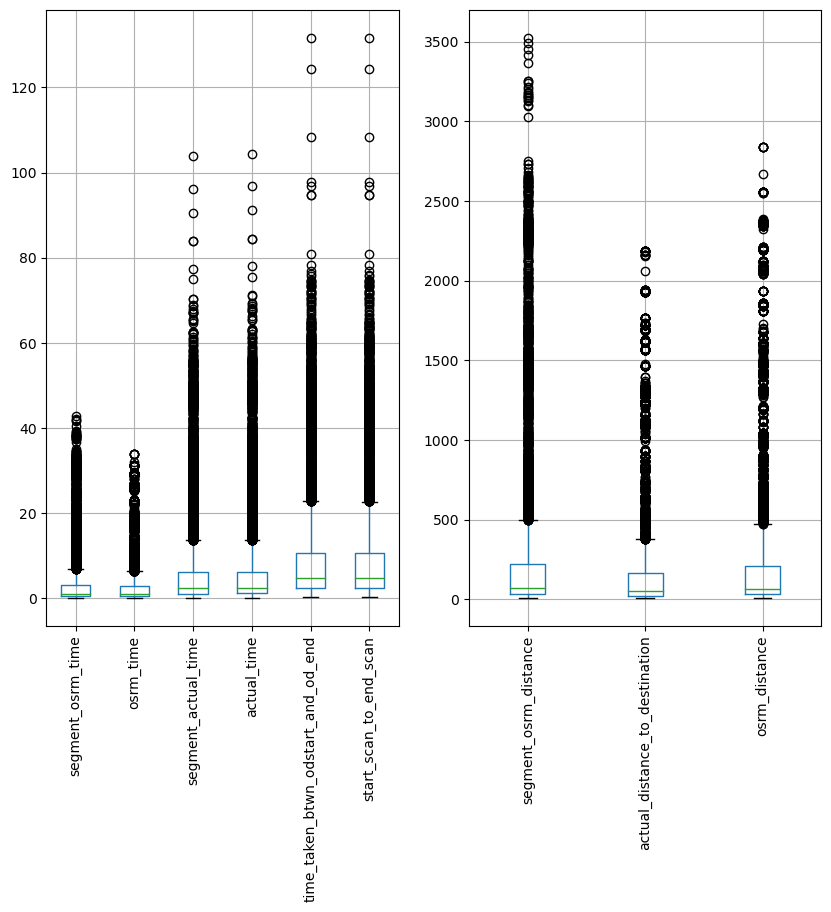

In [98]:
plt.figure(figsize = (10,8))
plt.subplot(121)
trip_records[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation =90)
plt.subplot(122)
trip_records[['segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()

In [99]:
outlier_treatment  = trip_records.copy()

In [100]:
outlier_treatment_num = outlier_treatment[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan',
        'segment_osrm_distance', 'actual_distance_to_destination',
        'osrm_distance']]

In [101]:
trip_records_without_outliers = trip_records.loc[outlier_treatment_num[(np.abs(stats.zscore(outlier_treatment_num)) < 3).all(axis=1)].index]
trip_records_without_outliers

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Bhopal Madhya Pradesh Kanpur Uttar Pradesh,Kanpur Uttar Pradesh Gurgaon Haryana,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,16.800000,12.383333,25.800000,26.033333,37.666667,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,Tumkur Doddablpur,Doddablpur Chikblapur,Tumkur Karnataka Doddablpur Karnataka,Doddablpur Karnataka Chikblapur Karnataka,Karnataka,Karnataka,1.083333,1.133333,2.350000,2.383333,3.033333,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
3,trip-153671046011330457,Carting,Mumbai,Mumbai,Mumbai Hub Maharashtra,Mumbai Maharashtra,Hub Maharashtra,Maharashtra,0.266667,0.250000,0.983333,0.983333,1.666667,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,Bellary Hospet Sandur,Hospet Sandur Bellary,Bellary Karnataka Hospet Karnataka Sandur Karn...,Hospet Karnataka Sandur Karnataka Bellary Karn...,Karnataka,Karnataka,1.916667,1.950000,5.666667,5.683333,11.966667,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
5,trip-153671055416136166,Carting,Chennai,Chennai,Chennai Tamil Nadu,Chennai Tamil Nadu,Tamil Nadu,Tamil Nadu,0.383333,0.383333,1.000000,1.016667,3.183333,3.150000,28.0647,24.597048,28.0647,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Carting,Chandigarh,Zirakpur Chandigarh,Chandigarh Punjab Chandigarh Chandigarh,Zirakpur Punjab Chandigarh Punjab,Punjab Chandigarh,Punjab,1.033333,1.033333,1.366667,1.383333,4.300000,4.283333,64.8551,57.762332,73.4630,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,Carting,FBD,Faridabad,FBD Haryana,Faridabad Haryana,Haryana,Haryana,0.183333,0.200000,0.350000,0.350000,1.000000,1.000000,16.0883,15.513784,16.0882,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,Carting,Kanpur,Kanpur,Kanpur Uttar Pradesh,Kanpur Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,1.466667,0.900000,4.683333,4.700000,7.033333,7.016667,104.8866,38.684839,63.2841,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,Carting,Tirunelveli Eral Tirchchndr Thisayanvilai Peik...,Eral Tirchchndr Thisayanvilai Peikulam Tirunel...,Tirunelveli Tamil Nadu Eral Tamil Nadu Tirchch...,Eral Tamil Nadu Tirchchndr Tamil Nadu Thisayan...,Tamil Nadu,Tamil Nadu,3.683333,3.066667,4.300000,4.400000,5.050000,5.783333,223.5324,134.723836,177.6635,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


# One Hot Encoding

In [102]:
trip_records_without_outliers["destination_source_locations"] = trip_records_without_outliers["source_city_state"]+" "+trip_records_without_outliers["destination_city_state"]
trip_records_without_outliers.drop(["source_city_state","destination_city_state"],axis = 1,inplace=True)

In [103]:
sc_dc = trip_records_without_outliers.groupby(["destination_source_locations"])["trip_uuid"].nunique().sort_values(ascending= False).reset_index()

In [104]:
def get_cat(H):
    if 0 <= H <= 50:
        return "Category 7"
    elif 51 <= H <= 100:
        return "Category 6"
    elif 101 <= H <= 200:
        return "Category 5"
    elif 201 <= H <= 300:
        return "Category 4"
    elif 301 <= H <= 400:
        return "Category 3"
    elif 401 <= H <= 500:
        return "Category 2"
    else:
        return "Category 1"

In [105]:
sc_dc["city"]  = pd.Series(map(get_cat,sc_dc["trip_uuid"]))
trip_records_for_encoding = sc_dc.merge(trip_records_without_outliers,
            on="destination_source_locations")
trip_records_for_encoding.drop(["destination_source_locations","trip_uuid_x"],axis = 1,inplace=True)
trip_records_for_encoding.drop(["trip_uuid_y"],axis = 1,inplace=True)
# trip_records_for_encoding.sample(15)
encoded_data = pd.get_dummies(trip_records_for_encoding,
             columns=["route_type","city"] )
encoded_data

,source_city,destination_city,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,...,route_schedule_uuid,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
0,Bengaluru,Bengaluru,Karnataka,Karnataka,1.383333,0.950000,3.183333,3.233333,4.400000,4.400000,...,thanos::sroute:09b4c49e-0e89-40b6-99b3-e671400...,True,False,True,False,False,False,False,False,False
1,Bengaluru,Bengaluru,Karnataka,Karnataka,1.150000,0.883333,2.666667,2.700000,4.050000,4.050000,...,thanos::sroute:500aa87c-3d54-4159-a296-0b93c15...,True,False,True,False,False,False,False,False,False
2,Bengaluru,Bengaluru,Karnataka,Karnataka,1.183333,0.966667,3.316667,3.333333,4.083333,4.066667,...,thanos::sroute:16a02d06-e6b6-443b-bd98-0a9e4f4...,True,False,True,False,False,False,False,False,False
3,Bengaluru,Bengaluru,Karnataka,Karnataka,0.700000,0.733333,1.316667,1.316667,4.916667,4.900000,...,thanos::sroute:5ffb9921-f943-446e-8796-0b06aa2...,True,False,True,False,False,False,False,False,False
4,Bengaluru,Bengaluru,Karnataka,Karnataka,0.783333,0.666667,1.750000,1.766667,3.250000,3.233333,...,thanos::sroute:39928fa7-4ce7-4b78-8e00-c56e31d...,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,Hyderabad Kadthal Kalwakurthy Devarakonda,Kadthal Kalwakurthy Devarakonda Haliya,Telangana,Telangana,1.966667,1.983333,3.233333,3.250000,6.216667,6.183333,...,thanos::sroute:36a3bd62-25dc-44c9-957b-8bcf117...,False,True,False,False,False,False,False,False,True
14156,Hyderabad Kadthal,Kadthal Devarakonda,Telangana,Telangana,1.483333,1.433333,2.716667,2.750000,5.633333,5.600000,...,thanos::sroute:36a3bd62-25dc-44c9-957b-8bcf117...,False,True,False,False,False,False,False,False,True
14157,Hyderabad Kadthal Haliya,Kadthal Kalwakurthy Hyderabad,Telangana,Telangana,2.916667,2.866667,4.950000,4.983333,7.733333,7.716667,...,thanos::sroute:36a3bd62-25dc-44c9-957b-8bcf117...,False,True,False,False,False,False,False,False,True
14158,Hyderabad Kadthal Haliya,Kadthal Devarakonda Hyderabad,Telangana,Telangana,3.383333,3.333333,10.950000,10.966667,13.933333,13.916667,...,thanos::sroute:36a3bd62-25dc-44c9-957b-8bcf117...,False,True,False,False,False,False,False,False,True


In [106]:
['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan' ,'segment_osrm_distance', 'actual_distance_to_destination','osrm_distance' ]

['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [108]:
scaler = StandardScaler()
std_data = scaler.fit_transform(encoded_data[['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']])
std_data = pd.DataFrame(std_data, columns=['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance'])
std_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,-0.269133,-0.409683,-0.220225,-0.214843,-0.393993,-0.391956,-0.362747,-0.450888,-0.468190
1,-0.359785,-0.438916,-0.324535,-0.321822,-0.446396,-0.444397,-0.448864,-0.542288,-0.521446
2,-0.346835,-0.402374,-0.193306,-0.194785,-0.441405,-0.441900,-0.416136,-0.451494,-0.414618
3,-0.534615,-0.504692,-0.597087,-0.599297,-0.316637,-0.317039,-0.536543,-0.516196,-0.529763
4,-0.502239,-0.533926,-0.509601,-0.509034,-0.566174,-0.566761,-0.549293,-0.536356,-0.565995


In [109]:
scaler = MinMaxScaler()
MinMax_data = scaler.fit_transform(encoded_data[['segment_osrm_time','osrm_time','segment_actual_time','actual_time',
 'time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan','segment_osrm_distance','actual_distance_to_destination',
 'osrm_distance']])
MinMax_data = pd.DataFrame(MinMax_data,columns=['segment_osrm_time',
 'osrm_time','segment_actual_time','actual_time','time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan',
 'segment_osrm_distance','actual_distance_to_destination','osrm_distance'])
MinMax_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,0.069369,0.059302,0.098113,0.098719,0.098401,0.098811,0.046420,0.031804,0.036747
1,0.056757,0.054651,0.081402,0.081644,0.089791,0.090201,0.034665,0.018854,0.028743
2,0.058559,0.060465,0.102426,0.101921,0.090611,0.090611,0.039132,0.031718,0.044799
3,0.032432,0.044186,0.037736,0.037353,0.111111,0.111111,0.022697,0.022551,0.027493
4,0.036937,0.039535,0.051752,0.051761,0.070111,0.070111,0.020957,0.019694,0.022047


In [110]:
std_data

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,-0.269133,-0.409683,-0.220225,-0.214843,-0.393993,-0.391956,-0.362747,-0.450888,-0.468190
1,-0.359785,-0.438916,-0.324535,-0.321822,-0.446396,-0.444397,-0.448864,-0.542288,-0.521446
2,-0.346835,-0.402374,-0.193306,-0.194785,-0.441405,-0.441900,-0.416136,-0.451494,-0.414618
3,-0.534615,-0.504692,-0.597087,-0.599297,-0.316637,-0.317039,-0.536543,-0.516196,-0.529763
4,-0.502239,-0.533926,-0.509601,-0.509034,-0.566174,-0.566761,-0.549293,-0.536356,-0.565995
...,...,...,...,...,...,...,...,...,...
14155,-0.042502,0.043440,-0.210131,-0.211500,-0.121998,-0.124754,0.107675,0.278861,0.169418
14156,-0.230282,-0.197738,-0.314441,-0.311792,-0.209336,-0.212156,-0.123317,-0.165131,-0.097018
14157,0.326583,0.430787,0.136448,0.136179,0.105081,0.104990,0.360386,0.434538,0.512552
14158,0.507888,0.635424,1.347789,1.336342,1.033358,1.033953,0.662356,0.578210,0.760187


In [111]:
one_hot_encoded_data = encoded_data[["route_type_Carting","route_type_FTL","city_Category 1",
 "city_Category 2","city_Category 3","city_Category 4",
 "city_Category 5","city_Category 6","city_Category 7"]]

In [112]:
Standardized_Data = pd.concat([std_data,one_hot_encoded_data],axis = 1)
Min_Max_Scaled_Data = pd.concat([MinMax_data,one_hot_encoded_data],axis = 1)

In [113]:
Standardized_Data.sample(5)

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
3971,-0.489288,-0.577777,-0.644195,-0.642757,-0.685952,-0.686627,-0.502584,-0.570750,-0.542035,True,False,False,False,False,False,True,False,False
1991,-0.722395,-0.723945,-0.704762,-0.706275,-0.738354,-0.736571,-0.680613,-0.673658,-0.688412,True,False,False,False,True,False,False,False,False
6015,-0.541090,-0.548543,-0.603817,-0.602640,-0.755822,-0.756549,-0.591307,-0.579815,-0.608178,True,False,False,False,False,False,False,False,True
12668,-0.262657,-0.263514,-0.391832,-0.395369,-0.141961,-0.139737,-0.228682,-0.289962,-0.243038,False,True,False,False,False,False,False,False,True
7702,-0.618792,-0.607010,-0.593722,-0.589267,-0.675970,-0.676638,-0.526743,-0.485415,-0.520276,True,False,False,False,False,False,False,False,True


In [114]:
Min_Max_Scaled_Data.sample(5)

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
6729,0.102703,0.083721,0.132075,0.132871,0.111931,0.111931,0.109883,0.051977,0.072514,True,False,False,False,False,False,False,False,True
8628,0.101802,0.133721,0.105660,0.105123,0.079131,0.079541,0.077988,0.092858,0.093836,False,True,False,False,False,False,False,False,True
1117,0.055856,0.047674,0.041509,0.041622,0.140221,0.140631,0.039202,0.018089,0.024451,True,False,True,False,False,False,False,False,False
4089,0.024324,0.027907,0.064690,0.064034,0.053711,0.054121,0.018932,0.014432,0.018938,True,False,False,False,False,False,True,False,False
12361,0.133333,0.174419,0.129380,0.129669,0.125051,0.125051,0.106222,0.114502,0.127807,False,True,False,False,False,False,False,False,True


In [116]:
A = data.groupby("route_schedule_uuid")["route_type"].unique().reset_index()
B = data.groupby("route_schedule_uuid")["destination_city"].unique().reset_index()
B.columns = ["route_schedule_uuid","destination_cities"]
C = data.groupby("route_schedule_uuid")["source_city"].unique().reset_index()
C.columns = ["route_schedule_uuid","source_cities"]
D = data.groupby("route_schedule_uuid")["source_state"].unique().reset_index()
D.columns = ["route_schedule_uuid","source_states"]
E = data.groupby("route_schedule_uuid")["destination_state"].unique().reset_index()
E.columns = ["route_schedule_uuid","destination_states"]
F = data.groupby("route_schedule_uuid")[["source_state","destination_state"]].nunique().sort_values(by="source_state", ascending=False).reset_index()
F.columns = ["route_schedule_uuid","#source_states","#destination_states"]
G = trip_records.groupby("route_schedule_uuid")["actual_distance_to_destination"].mean().reset_index()
G.columns = ["route_schedule_uuid","Average_Actual_distance_to_destination"]
H = trip_records["route_schedule_uuid"].value_counts().reset_index()
H.columns = ["route_schedule_uuid","Number_of_Trips"]
I = data.groupby("route_schedule_uuid")[["source_city", "destination_city"]].nunique().sort_values(by="source_city",ascending=False).reset_index()
I.columns = ["route_schedule_uuid","#source_cities","#destination_cities"]

In [117]:
route_records = I.merge(H.merge(G.merge(F.merge(E.merge(D.merge(C.merge(A.merge(B,
        on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer")

In [118]:
route_records.isna().sum()

route_schedule_uuid                       0
#source_cities                            0
#destination_cities                       0
Number_of_Trips                           0
Average_Actual_distance_to_destination    0
#source_states                            0
#destination_states                       0
destination_states                        0
source_states                             0
source_cities                             0
route_type                                0
destination_cities                        0
dtype: int64

In [119]:
route_records.dropna(inplace=True)

In [120]:
route_records["route_type"] = route_records["route_type"].astype("str").str.strip("[]").str.replace("'","")
route_records["source_cities"] = route_records["source_cities"].astype("str").str.strip("[]").str.replace("'","")
route_records["destination_cities"] = route_records["destination_cities"].astype("str").str.strip("[]").str.replace("'","")
route_records["source_states"] = route_records["source_states"].astype("str").str.strip("[]").str.replace("'","")
                             
route_records["destination_states"] = route_records["destination_states"].astype("str").str.strip("[]").str.replace("'","")

In [121]:
route_records

,route_schedule_uuid,#source_cities,#destination_cities,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
0,thanos::sroute:d010efca-d90d-4977-b987-eae68c5...,13,11,14,281.596486,2,2,Assam Arunachal Pradesh,Assam Arunachal Pradesh,Guwahati LakhimpurN Dhemaji Likabali Tezpur Pa...,FTL,Tezpur Dhemaji Silapathar Pasighat Mangaldoi I...
1,thanos::sroute:4cbecb35-356b-4b68-bf3c-6225b5e...,10,10,12,332.602225,2,2,Assam Meghalaya,Assam Meghalaya,Guwahati Rangia Kokrajhar Dhubri Bilasipara Tu...,FTL,Rangia Nalbari Dhubri Bilasipara Lakhipur Guwa...
2,thanos::sroute:ae5c430f-6153-48d1-8fe5-d5f0bbc...,10,10,20,351.611796,1,1,Rajasthan,Rajasthan,Jaipur Chomu Reengus Sikar Bikaner Didwana Suj...,FTL,Chomu Reengus Sikar Bikaner Nokha Sujangarh Ja...
3,thanos::sroute:f8968c72-5222-4d81-9eed-8a6d88f...,9,9,9,195.257193,1,2,Karnataka Goa,Karnataka,Mangalore Udupi Kundapura Bhatkal Honnavar Kum...,FTL,Uchila Kundapura Bhatkal Honnavar Kumta Ankola...
4,thanos::sroute:ed5b80be-7abf-424d-b8cd-d81556a...,9,8,20,178.737233,1,1,Rajasthan,Rajasthan,Ajmer Beawar Bilara Bijainagar Kekri Nasirabad...,FTL,Beawar Bilara Badnaur Kekri Nasirabad Ajmer Bi...
...,...,...,...,...,...,...,...,...,...,...,...,...
1499,thanos::sroute:9e7bb811-593f-47bc-ac49-ba03ed8...,1,1,19,17.617532,1,1,Maharashtra,Maharashtra,Mumbai,Carting,Mumbai
1500,thanos::sroute:46b9641b-55b5-4b15-b039-2612a50...,1,1,15,10.137219,1,1,Maharashtra,Maharashtra,Mumbai,Carting,Mumbai
1501,thanos::sroute:b48f633d-15cb-4744-a0b9-21df0a9...,1,1,7,15.467701,1,1,Karnataka,Karnataka,Bengaluru,Carting,Bengaluru
1502,thanos::sroute:265efe06-3625-4fba-afee-07b5b64...,0,1,1,236.815038,0,1,Uttar Pradesh,nan,nan,FTL,Mainpuri


In [122]:
route_records["ROUTE"] = route_records["source_cities"] + " -- " + route_records["destination_cities"]
route_records.drop(["route_schedule_uuid"],axis = 1,inplace=True)
first_column = route_records.pop('ROUTE')
route_records.insert(0, 'ROUTE', first_column) 
route_records["SouceToDestination_city"] = route_records["source_cities"].str.split(" ").apply(lambda x:x[0]) +" TO " +route_records["destination_cities"].str.split(" ").apply(lambda x:x[-1])
first_column = route_records.pop('SouceToDestination_city')
route_records.insert(0, 'SouceToDestination_city', first_column) 
route_records

,SouceToDestination_city,ROUTE,#source_cities,#destination_cities,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
0,Guwahati TO LakhimpurN,Guwahati LakhimpurN Dhemaji Likabali Tezpur Pa...,13,11,14,281.596486,2,2,Assam Arunachal Pradesh,Assam Arunachal Pradesh,Guwahati LakhimpurN Dhemaji Likabali Tezpur Pa...,FTL,Tezpur Dhemaji Silapathar Pasighat Mangaldoi I...
1,Guwahati TO Tura,Guwahati Rangia Kokrajhar Dhubri Bilasipara Tu...,10,10,12,332.602225,2,2,Assam Meghalaya,Assam Meghalaya,Guwahati Rangia Kokrajhar Dhubri Bilasipara Tu...,FTL,Rangia Nalbari Dhubri Bilasipara Lakhipur Guwa...
2,Jaipur TO Tarnau,Jaipur Chomu Reengus Sikar Bikaner Didwana Suj...,10,10,20,351.611796,1,1,Rajasthan,Rajasthan,Jaipur Chomu Reengus Sikar Bikaner Didwana Suj...,FTL,Chomu Reengus Sikar Bikaner Nokha Sujangarh Ja...
3,Mangalore TO Udupi,Mangalore Udupi Kundapura Bhatkal Honnavar Kum...,9,9,9,195.257193,1,2,Karnataka Goa,Karnataka,Mangalore Udupi Kundapura Bhatkal Honnavar Kum...,FTL,Uchila Kundapura Bhatkal Honnavar Kumta Ankola...
4,Ajmer TO Raipur,Ajmer Beawar Bilara Bijainagar Kekri Nasirabad...,9,8,20,178.737233,1,1,Rajasthan,Rajasthan,Ajmer Beawar Bilara Bijainagar Kekri Nasirabad...,FTL,Beawar Bilara Badnaur Kekri Nasirabad Ajmer Bi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,Mumbai TO Mumbai,Mumbai -- Mumbai,1,1,19,17.617532,1,1,Maharashtra,Maharashtra,Mumbai,Carting,Mumbai
1500,Mumbai TO Mumbai,Mumbai -- Mumbai,1,1,15,10.137219,1,1,Maharashtra,Maharashtra,Mumbai,Carting,Mumbai
1501,Bengaluru TO Bengaluru,Bengaluru -- Bengaluru,1,1,7,15.467701,1,1,Karnataka,Karnataka,Bengaluru,Carting,Bengaluru
1502,nan TO Mainpuri,nan -- Mainpuri,0,1,1,236.815038,0,1,Uttar Pradesh,nan,nan,FTL,Mainpuri


# Exploratory Data Analysis : (getting some insights from preprocessed data) 

### Busiest Route Analysis :¶
Number of Trips between cities , sorted highest to lowest

Top 20 source and destination cities wihc have high freqency of trips in between 

In [123]:
Number_of_trips_between_cities = data.groupby(["source_city_state",
                                               "destination_city_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
Number_of_trips_between_cities.head(25)

,source_city_state,destination_city_state,trip_uuid
0,Bengaluru Karnataka,Bengaluru Karnataka,1369
1,Bhiwandi Maharashtra,Mumbai Maharashtra,512
2,Mumbai Maharashtra,Mumbai Maharashtra,361
3,Hyderabad Telangana,Hyderabad Telangana,308
4,Mumbai Maharashtra,Bhiwandi Maharashtra,282
5,Delhi Delhi,Gurgaon Haryana,248
6,Gurgaon Haryana,Delhi Delhi,237
7,Mumbai Hub Maharashtra,Mumbai Maharashtra,227
8,Chennai Tamil Nadu,Chennai Tamil Nadu,205
9,MAA Tamil Nadu,Chennai Tamil Nadu,204


From above table, we can observe cities have higest amount of trips happening :

In [124]:
Number_of_trips_between_cities.loc[Number_of_trips_between_cities["source_city_state"] != Number_of_trips_between_cities["destination_city_state"]].head(25)

,source_city_state,destination_city_state,trip_uuid
1,Bhiwandi Maharashtra,Mumbai Maharashtra,512
4,Mumbai Maharashtra,Bhiwandi Maharashtra,282
5,Delhi Delhi,Gurgaon Haryana,248
6,Gurgaon Haryana,Delhi Delhi,237
7,Mumbai Hub Maharashtra,Mumbai Maharashtra,227
9,MAA Tamil Nadu,Chennai Tamil Nadu,204
10,Chennai Tamil Nadu,MAA Tamil Nadu,141
11,Bengaluru Karnataka,HBR Karnataka,133
13,Pune Maharashtra,PNQ Maharashtra,122
16,Pune Maharashtra,Bhiwandi Maharashtra,107


In [125]:
route_records[["ROUTE","Number_of_Trips",
               "Average_Actual_distance_to_destination",
               "#source_cities",
               "#destination_cities"]].sort_values(by="Number_of_Trips",ascending=False).head(25)

,ROUTE,Number_of_Trips,Average_Actual_distance_to_destination,#source_cities,#destination_cities
1465,LowerParel -- Mumbai,53,16.428868,1,1
1426,Mumbai -- Bhiwandi,46,20.199445,1,1
808,Gurgaon -- Gurgaon,43,29.740842,1,1
679,Jaipur -- Ambabadi Jaipur,41,15.348495,1,2
1257,Noida -- Del,40,10.882902,1,1
1368,Hyderabad -- Hyderabad,39,35.695641,1,1
1273,Mumbai -- Mumbai,37,13.882863,1,1
1359,Mumbai -- Mumbai,36,17.526251,1,1
1303,Bhiwandi -- Mumbai,35,21.241534,1,1
700,Mumbai -- Mumbai,34,15.906614,1,1


#### Top Routes having Maximum Number of Trips between/within the source and destinations 

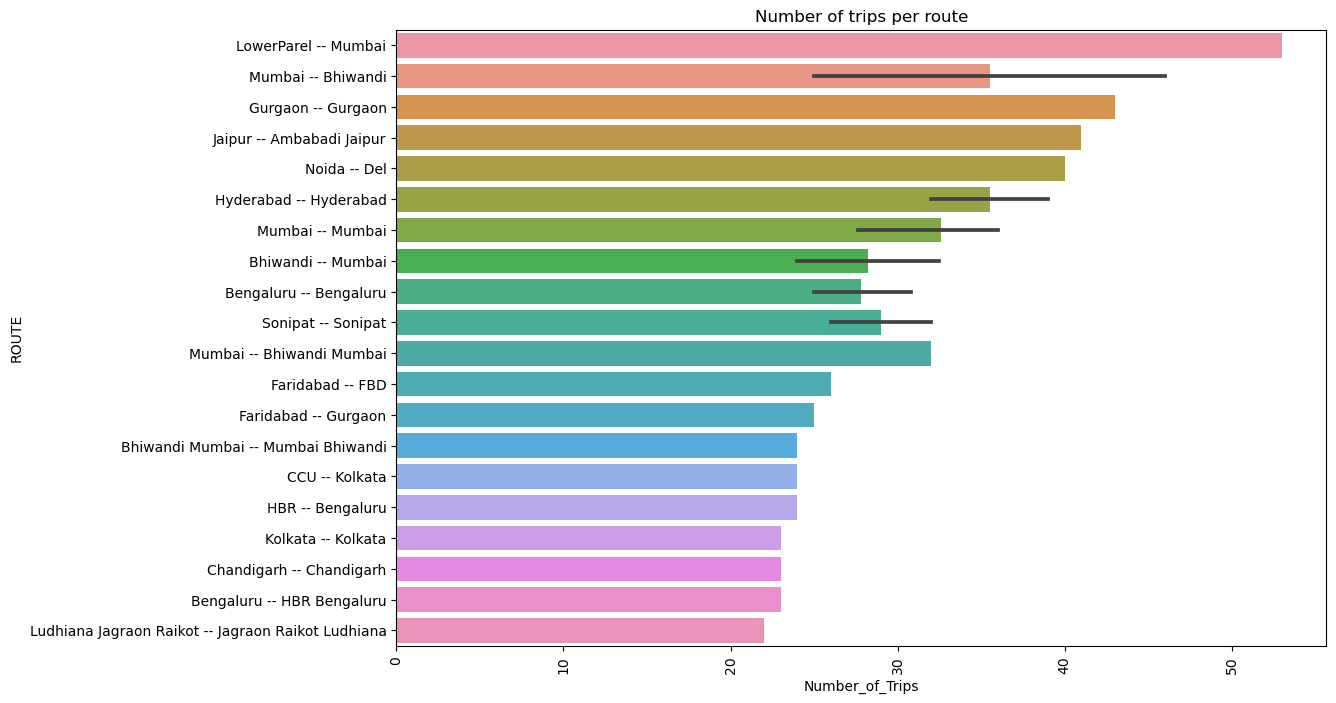

In [126]:
plt.figure(figsize=(12,8))

X = route_records[["ROUTE", "Number_of_Trips",
               ]].sort_values(by="Number_of_Trips",ascending=False).head(35)
sns.barplot(y = X["ROUTE"],
           x= X["Number_of_Trips"])
plt.title("Number of trips per route")
plt.xticks(rotation = 90)
plt.show()

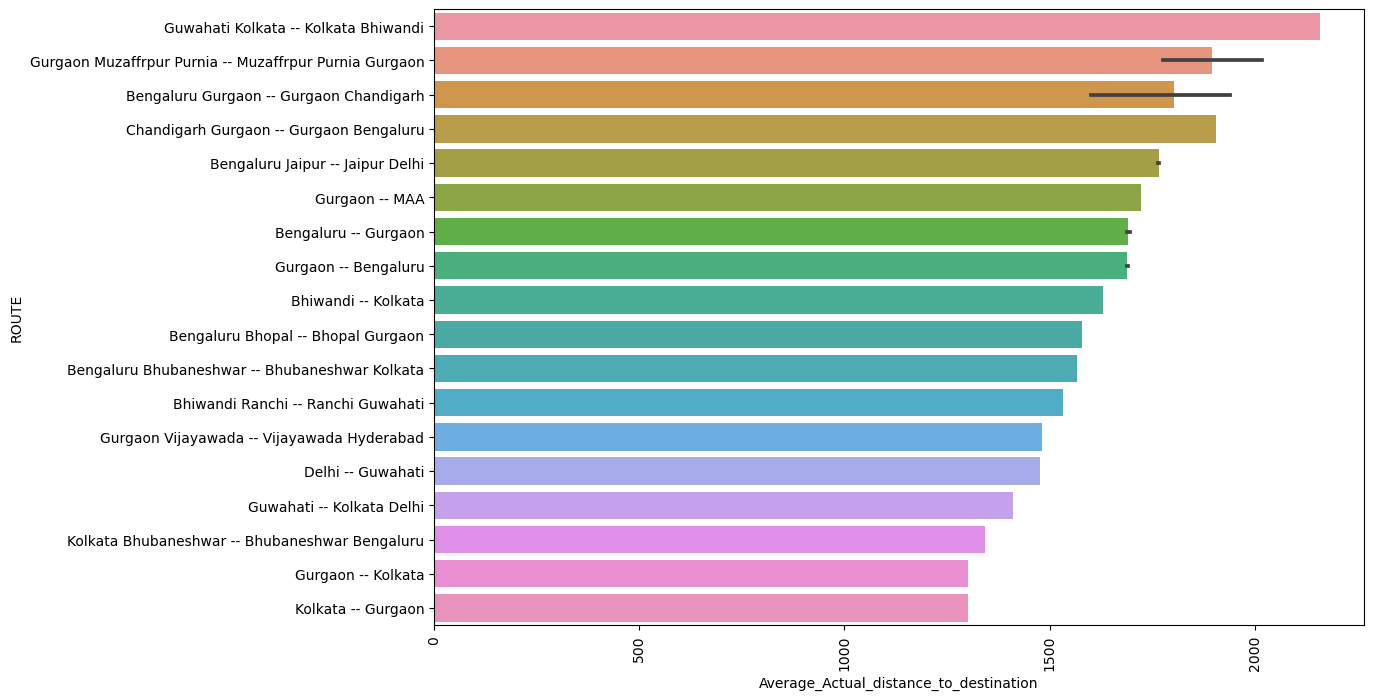

In [127]:
plt.figure(figsize=(12,8))

X = route_records[["ROUTE", "Average_Actual_distance_to_destination",
               ]].sort_values(by="Average_Actual_distance_to_destination",ascending=False).head(25)
sns.barplot(y = X["ROUTE"],
           x = X["Average_Actual_distance_to_destination"])
plt.xticks(rotation = 90)
plt.show()

#### Busiest and Longest Routes

In [128]:
Busiest_and_Longest_Routes  = route_records[(route_records["Average_Actual_distance_to_destination"] > route_records["Average_Actual_distance_to_destination"].quantile(0.75)) 
              & (route_records["Number_of_Trips"] > route_records["Number_of_Trips"].quantile(0.75))].sort_values(by="Average_Actual_distance_to_destination"
                                                                                                                  ,ascending=False)
Busiest_and_Longest_Routes_top25 = Busiest_and_Longest_Routes[["source_cities",
                                                               "destination_cities",
                                                               "Number_of_Trips",
                                                               "Average_Actual_distance_to_destination"]].head(25)
Busiest_and_Longest_Routes_top25

,source_cities,destination_cities,Number_of_Trips,Average_Actual_distance_to_destination
629,Chandigarh Gurgaon,Gurgaon Bengaluru,22,1905.766051
995,Gurgaon,Bengaluru,21,1689.873158
991,Gurgaon,Bengaluru,21,1689.791894
512,Bengaluru Bhubaneshwar,Bhubaneshwar Kolkata,18,1567.577507
745,Guwahati,Kolkata Delhi,18,1411.208424
624,Kolkata Bhubaneshwar,Bhubaneshwar Bengaluru,16,1342.143081
752,Gurgaon,Kolkata,16,1300.572161
588,Delhi Gurgaon,Gurgaon Kolkata,18,1263.113212
826,Gurgaon,Hyderabad,16,1236.572072
541,Chandigarh Gurgaon,Gurgaon Bhiwandi,20,1170.817927


Above Table shows the souce to destination city routes having largest numbers of trip happening having large distnaces : which are :

Chandigarh TO Bengaluru

Gurgaon TO Bengaluru

Bengaluru TO Kolkata

Guwahati TO Delhi

Delhi TO Kolkata

Chandigarh TO Gurgaon

Gurgaon TO Hydrabad

Benglore TO Ahmedabad

Surat TO Delhi

Gurgaon TO Ahmedabad**

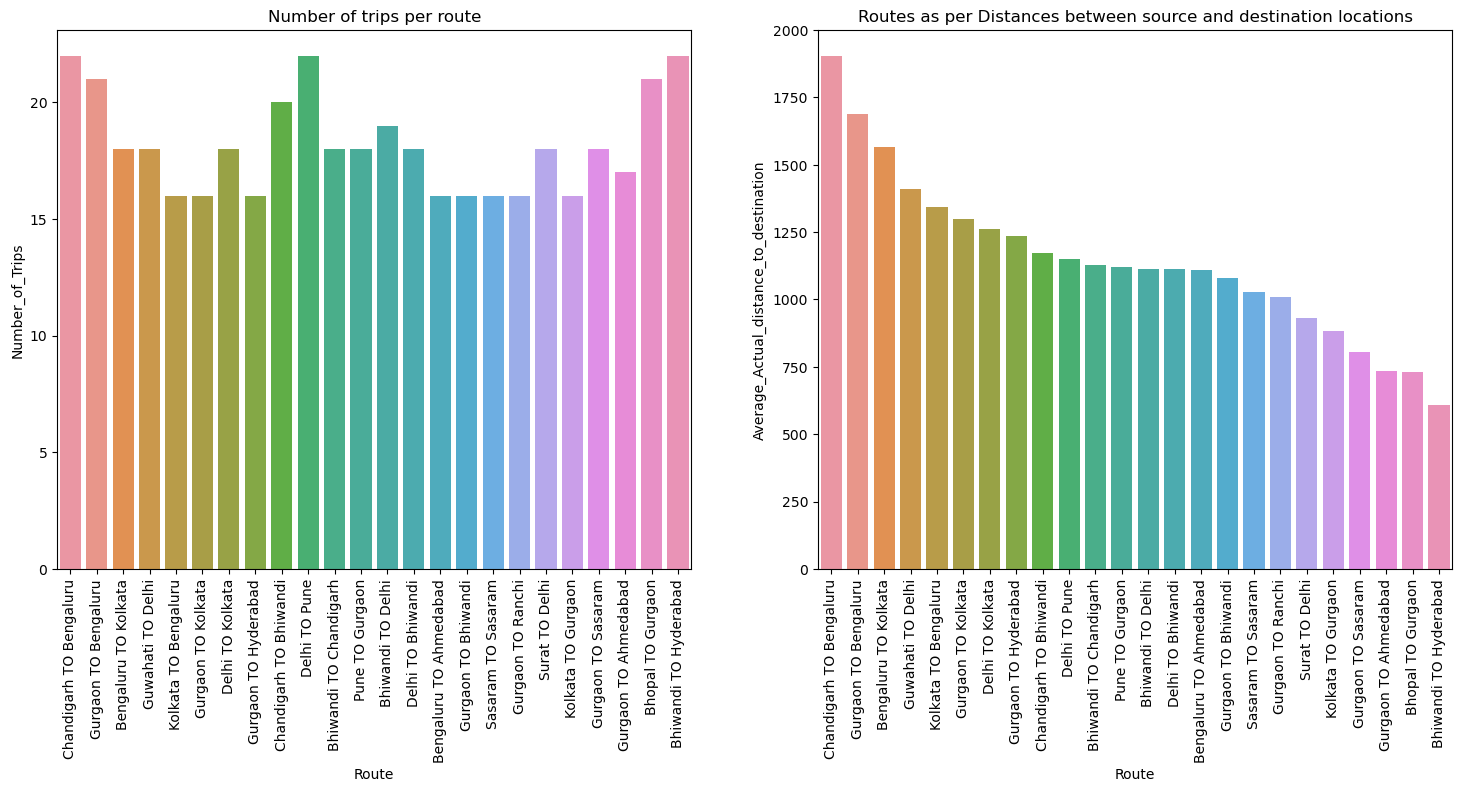

In [129]:
Busiest_and_Longest_Routes_top25["Route"] = Busiest_and_Longest_Routes_top25["source_cities"].str.split(" ").apply(lambda x:x[0]) + " TO " + Busiest_and_Longest_Routes_top25["destination_cities"].str.split(" ").apply(lambda x:x[-1])
Busiest_and_Longest_Routes_top25.drop(["source_cities","destination_cities"],axis = 1,inplace=True)
plt.figure(figsize=(18,7))

plt.subplot(121)
plt.title("Number of trips per route")
sns.barplot(x=Busiest_and_Longest_Routes_top25["Route"],
           y = Busiest_and_Longest_Routes_top25["Number_of_Trips"])
plt.xticks(rotation = 90)
plt.subplot(122)
plt.title("Routes as per Distances between source and destination locations")
sns.barplot(x=Busiest_and_Longest_Routes_top25["Route"],
           y= Busiest_and_Longest_Routes_top25["Average_Actual_distance_to_destination"])
plt.xticks(rotation = 90)
plt.show()

#### Routes : passing through maxinum number of cities

In [130]:
route_records[["SouceToDestination_city","Number_of_Trips",
               "Average_Actual_distance_to_destination",
               "#source_cities",
               "#destination_cities"]].sort_values(by=["#source_cities",
                                                       "#destination_cities",
                                                       "Number_of_Trips"]
                                                   ,ascending=False).head(25)

,SouceToDestination_city,Number_of_Trips,Average_Actual_distance_to_destination,#source_cities,#destination_cities
0,Guwahati TO LakhimpurN,14,281.596486,13,11
2,Jaipur TO Tarnau,20,351.611796,10,10
1,Guwahati TO Tura,12,332.602225,10,10
3,Mangalore TO Udupi,9,195.257193,9,9
4,Ajmer TO Raipur,20,178.737233,9,8
5,Mainpuri TO Tilhar,12,207.247057,8,8
8,Hassan TO Koppa,21,200.497832,7,7
15,Shrirampur TO Sangamner,20,204.509529,7,7
7,Musiri TO Tiruchi,19,219.845121,7,7
9,Bijnor TO Bijnor,17,209.400685,7,7


#### Top 20 Longest Route as per : average actual time taken from one city to another city :

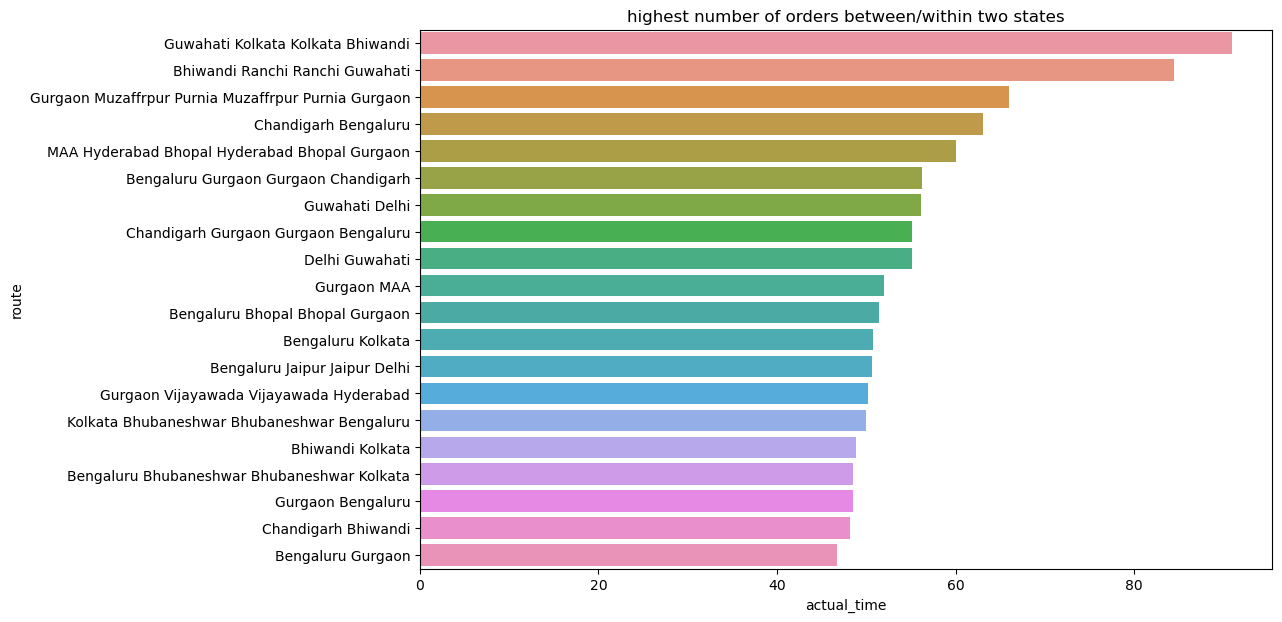

In [131]:
Longest_route_as_per_actual_trip_time = trip_records.groupby(["source_city",
                      "destination_city"])["actual_time"].mean().sort_values(ascending=False).head(20).reset_index()
Longest_route_as_per_actual_trip_time["route"] = Longest_route_as_per_actual_trip_time["source_city"] + " " + Longest_route_as_per_actual_trip_time["destination_city"]
Longest_route_as_per_actual_trip_time.drop(["source_city",
                                            "destination_city"],axis = 1,inplace=True)
Longest_route_as_per_actual_trip_time
plt.figure(figsize=(11,7))
sns.barplot(y = Longest_route_as_per_actual_trip_time["route"],
           x = Longest_route_as_per_actual_trip_time["actual_time"],)
plt.title("highest number of orders between/within two states")
plt.show()

#### highest number of Trips happening between/within two states

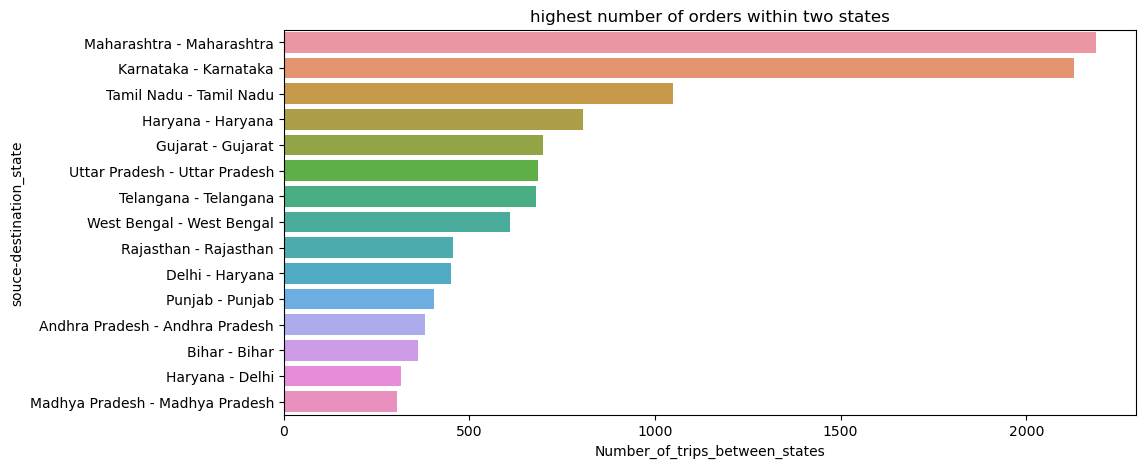

In [132]:
highest_order_between_states = data.groupby(["source_state",
                                             "destination_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
HOBS  = highest_order_between_states.head(15)
HOBS["souce-destination"] = HOBS["source_state"] + " - " + HOBS["destination_state"]
HOBS.drop(["source_state","destination_state"],axis = 1, inplace=True)
HOBS.columns = ["Number_of_trips_between_states","souce-destination_state"] 

plt.figure(figsize=(11,5))
sns.barplot(y = HOBS["souce-destination_state"],
           x = HOBS["Number_of_trips_between_states"],)
plt.title("highest number of orders within two states")
plt.show()

Within the state , Maharashtra , Karnataka, Tamil Nadu are some states having above 1000 trips. 

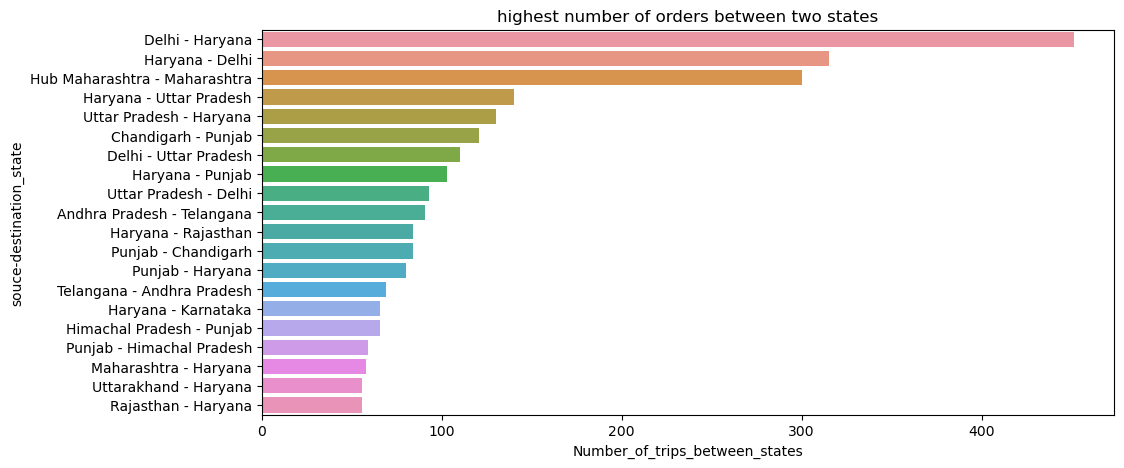

In [133]:
HOBS = data.groupby(["source_state","destination_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
HOBS = HOBS[HOBS["source_state"]!=HOBS["destination_state"]].head(20)

HOBS["souce-destination"] = HOBS["source_state"] + " - " + HOBS["destination_state"]
HOBS.drop(["source_state","destination_state"],axis = 1, inplace=True)
HOBS.columns = ["Number_of_trips_between_states","souce-destination_state"] 

plt.figure(figsize=(11,5))
sns.barplot(y = HOBS["souce-destination_state"],
           x = HOBS["Number_of_trips_between_states"],)
plt.title("highest number of orders between two states")
plt.show()

Delhi to Haryana is the busiest route, having more than 400 trips in between. Some of such busy routes are Haryana to Uttar Pradesh , Chandigarh to Punjab , Delhi to Uttar Pradesh .

#### Top 20 warehouses with heavy traffic

In [134]:
destination_traffic = data.groupby(["destination_city_state"])["trip_uuid"].nunique().reset_index()
source_traffic = data.groupby(["source_city_state"])["trip_uuid"].nunique().reset_index()
transactions = source_traffic.merge(destination_traffic,
                               left_on="source_city_state"
                               ,right_on="destination_city_state")
transactions.columns = ["source_city_state","#Trips_s","destination_city_state","#Trips_d"]
transactions["TripsTraffic"] = transactions["#Trips_s"]+transactions["#Trips_d"]
transactions.drop(["#Trips_s","#Trips_d","destination_city_state"],axis = 1,inplace=True)
transactions.columns = ["Warehouse_City(Junction)","TripsTraffic"]

In [135]:
T = transactions.sort_values(by=["TripsTraffic"],ascending=False).head(20)

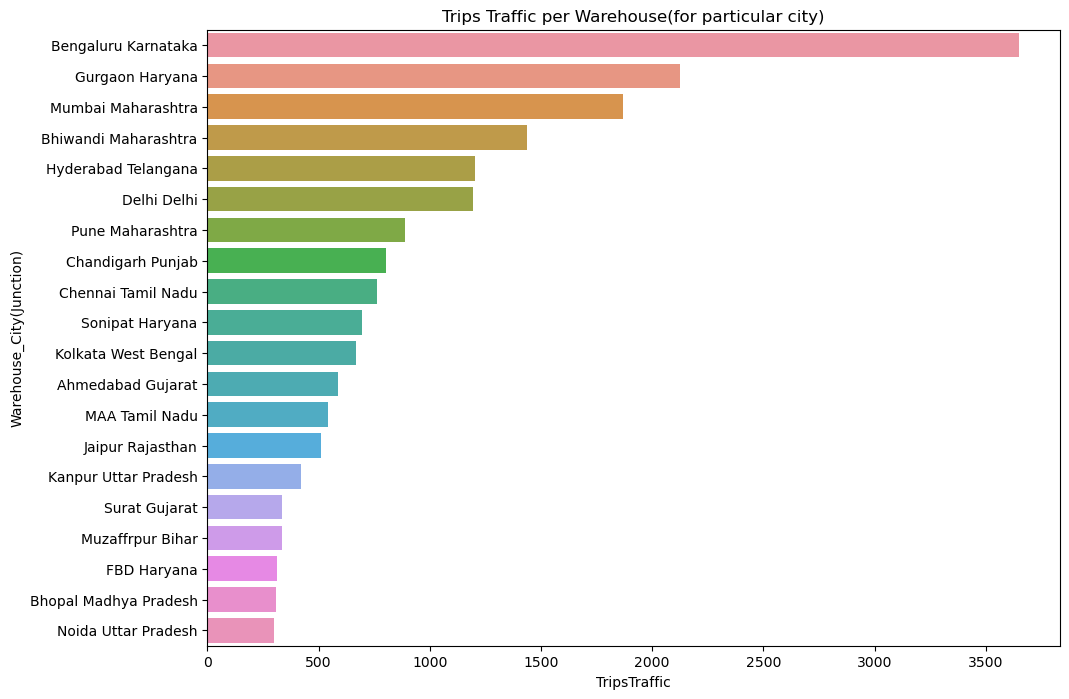

In [136]:
plt.figure(figsize=(11,8))
sns.barplot(y = T["Warehouse_City(Junction)"],
           x = T["TripsTraffic"])
plt.title("Trips Traffic per Warehouse(for particular city)")
plt.show()

Here’s the list of the top 20 busiest warehouse junctions as per traffic:

1. Bengaluru, Karnataka
2. Gurgaon, Haryana
3. Mumbai, Maharashtra
4. Bhiwandi, Maharashtra
5. Hyderabad, Telangana
6. Delhi, Delhi
7. Pune, Maharashtra
8. Chandigarh, Punjab
9. Chennai, Tamil Nadu
10. Sonipat, Haryana
11. Kolkata, West Bengal
12. Ahmedabad, Gujarat
13. MAA (Chennai), Tamil Nadu
14. Jaipur, Rajasthan
15. Kanpur, Uttar Pradesh
16. Surat, Gujarat
17. Muzaffarpur, Bihar
18. Faridabad (FBD), Haryana

In [137]:
trip_records.groupby(["source_state","destination_state"])["trip_uuid"].count().sort_values(ascending=False).head(15).reset_index()

,source_state,destination_state,trip_uuid
0,Maharashtra,Maharashtra,2085
1,Karnataka,Karnataka,2002
2,Tamil Nadu,Tamil Nadu,996
3,Haryana,Haryana,771
4,Telangana,Telangana,627
5,Gujarat,Gujarat,624
6,West Bengal,West Bengal,610
7,Uttar Pradesh,Uttar Pradesh,529
8,Rajasthan,Rajasthan,400
9,Delhi,Haryana,385


Here's the rewritten version with more detailed insights:

---

**Overview of Trip Data (September and October 2018):**

- **Total Trips**: A total of **14,817 unique trips** were recorded between various source and destination centers.
  
- **Delivery Routes**: These trips span across **1,504 unique delivery routes**, highlighting a diverse network of delivery paths.

- **Source and Destination Centers**: 
  - The trips originated from **1,508 unique source centers** and ended at **1,481 unique destination centers**, indicating a widespread distribution network with multiple origin and endpoint possibilities.
  
- **Trip Categories**:
  - Of the 14,817 total trips, **8,908 trips (60%)** were categorized as **Carting**, which involves smaller vehicles. These trips typically involve multiple pickups and drop-offs, suggesting a more flexible but time-consuming route structure.
  - The remaining **5,909 trips (40%)** were categorized as **FTL (Full Truck Load)**, where full trucks travel directly from source to destination without intermediate stops. This streamlined approach is faster and more efficient, as it avoids detours for additional pickups or deliveries.

**Derived Insights**:
1. **Efficient Route Utilization**: 
   - A significant portion of trips (40%) are **FTL**, reflecting an emphasis on quicker, uninterrupted deliveries for high-priority or large shipments. The higher percentage of **Carting** trips suggests optimization around maximizing vehicle utilization by handling multiple delivery tasks in a single route.
  
2. **Potential for Route Optimization**:
   - Given that **60% of trips involve Carting** (which can be more time-consuming), there may be opportunities to convert some of these routes into **FTL trips** to improve efficiency and reduce transit times, especially for time-sensitive deliveries.

3. **High Network Coverage**: 
   - The presence of **1,508 source centers** and **1,481 destination centers** indicates a well-distributed supply chain network. However, some of these centers may be underutilized or could serve as strategic points for centralizing shipments to streamline operations.
  
4. **Trip Distribution**: 
   - The nearly balanced number of unique source and destination centers suggests that trips are not concentrated in a few areas but are spread across many locations. This might help reduce bottlenecks in heavily trafficked routes, though further analysis could highlight any regional imbalances or under-served regions.

5. **Vehicle Utilization**:
   - The **Carting** trips, involving smaller vehicles, likely cater to short-haul or more fragmented delivery requirements. However, a closer analysis of these routes could reveal whether some Carting trips could be consolidated into larger shipments, improving overall vehicle utilization and reducing operational costs.

---

This breakdown not only highlights the main facts but also hints at areas for potential optimization and efficiency improvements in the delivery network.

Here's a more concise version of the hypothesis test results:

---

### **Hypothesis Test Results:**

1. **Time Between OD Start and End vs. Start Scan to End Scan**:  
   - The **average time between OD start and end** is **equal** to the **average start_scan to end_scan time**, indicating consistency in time tracking.

2. **Actual Delivery Time vs. Start Scan to End Scan**:  
   - The **average actual delivery time** is **less than** the **start_scan to end_scan time**, showing deliveries are completed faster than estimated.

3. **Actual Delivery Time vs. OD Start to OD End**:  
   - **Actual delivery time** and **OD start to end time** are **not the same**, suggesting discrepancies in tracking.

4. **Actual Time vs. OSRM Estimated Time**:  
   - The **actual delivery time** is **higher** than the **OSRM estimated time**, meaning OSRM underestimates real-world delivery durations.

5. **Actual Time vs. Segment Actual Time**:  
   - The **actual delivery time** is **equal** to the **segment actual time**, indicating consistency across segments.

6. **OSRM Estimated Time vs. Segment OSRM Time**:  
   - The **OSRM estimated time** is **not the same** as the **segment OSRM time**, pointing to discrepancies in time estimates.

7. **OSRM Time vs. Segment OSRM Time**:  
   - The **OSRM time** is **less than** the **segment OSRM time**, suggesting segment-level estimates are longer.

8. **OSRM Distance vs. Segment OSRM Distance**:  
   - The **OSRM distance** is **less than** the **segment OSRM distance**, showing inconsistencies in distance estimates.

9. **OSRM Estimated Distance vs. Actual Distance**:  
   - The **OSRM estimated distance** is **higher** than the **actual distance**, indicating OSRM overestimates trip distances.

---

### **Key Insights**:
- **OSRM estimates** for both time and distance tend to be inaccurate compared to actual data.
- **Deliveries are often completed faster** than estimated, reflecting operational efficiencies.
- **Segment-level tracking** is generally consistent, but estimates may need refinement for better accuracy.

Here’s a concise summary of the EDA results:

---

### **Exploratory Data Analysis Results:**

- **Cities with the Most Trips**:  
  Mumbai (Maharashtra), Delhi, Gurgaon (Haryana), Bengaluru (Karnataka), Hyderabad (Telangana), Chennai (Tamil Nadu), Ahmedabad (Gujarat), Pune (Maharashtra), Chandigarh, and Kolkata (West Bengal) are the cities with the highest volume of trips within their respective states.

- **Top Intercity Trip Routes**:  
  The busiest routes between different cities and states include:
  - **Delhi to Gurgaon**
  - **Gurgaon to Bengaluru**
  - **Bhiwandi/Mumbai to Pune (Maharashtra)**
  - **Sonipat to Gurgaon (Haryana)**

- **Airport Deliveries**:  
  A significant number of trips are directed to airports, including:
  - **Chennai to MAA (Chennai International Airport)**
  - **Pune to Pune Airport (PNQ)**
  - **Kolkata to CCU (Kolkata International Airport)**
  - **Bengaluru to BLR (Bengaluru International Airport)**

- **Longest Routes by Distance**:  
  From the bar charts and analysis, the longest routes by average distance include:
  - **Guwahati to Mumbai**
  - **Bengaluru to Chandigarh**
  - **Bengaluru to Delhi**
  - **Bengaluru to Gurgaon**

- **Key Insight**:  
  Most trips occur within individual cities, but significant long-distance routes and airport-related deliveries are also a crucial part of the network.

# Recommendations

### **Insights and Recommendations:**

1. **Vehicle Optimization for Delivery**:
   - **Carting (small vehicles)** should be prioritized for **intra-city deliveries** to reduce delivery time and increase operational efficiency. Using **heavy trucks** for **long-distance or heavy-load trips** will optimize transportation costs and improve delivery speed for such routes.

2. **Expansion into Tier 2 and Tier 3 Cities**:
   - **Increasing connectivity in tier 2 and tier 3 cities** will enhance delivery reach, contributing to higher revenue and stronger brand reputation. Collaborating with **e-commerce giants** in these regions can further boost revenue and expand the company's logistical footprint.

3. **Scanning Time Optimization**:
   - **Improving scanning times** (start and end) is critical. Reducing delays during these processes will align actual delivery times closer to the **OSRM estimated times**, optimizing trip performance and customer satisfaction.

4. **Routing Engine Reassessment**:
   - A thorough review of the **routing engine's configuration** and communication with **transporters** is recommended. Checking for discrepancies between planned routes and real-world performance can enhance route planning and ensure optimum delivery outcomes.

5. **Regional Focus for Growth**:
   - **North, South, and West zones** have the highest traffic, while **Central, Eastern, and North-Eastern zones** are underrepresented. Expanding presence in these underserved areas should be considered, though more data beyond the two-month period is needed to make informed decisions.

6. **Resource Allocation in Key States**:
   - **Maharashtra** and **Karnataka** experience heavy traffic, especially during festive seasons. These states should be prioritized for resource planning and staffing to handle peak demand periods efficiently.

